# Base Ball Case Study

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
df.head()

W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  SHO  \
0  95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2    8   
1  83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   12   
2  81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   10   
3  76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7    9   
4  74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   12   

   SV    E  
0  56   88  
1  45   86  
2  38   79  
3  37  101  
4  35   86

In [22]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [3]:
df.shape

(30, 17)

In [23]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [25]:
df.nunique()

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

In [26]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

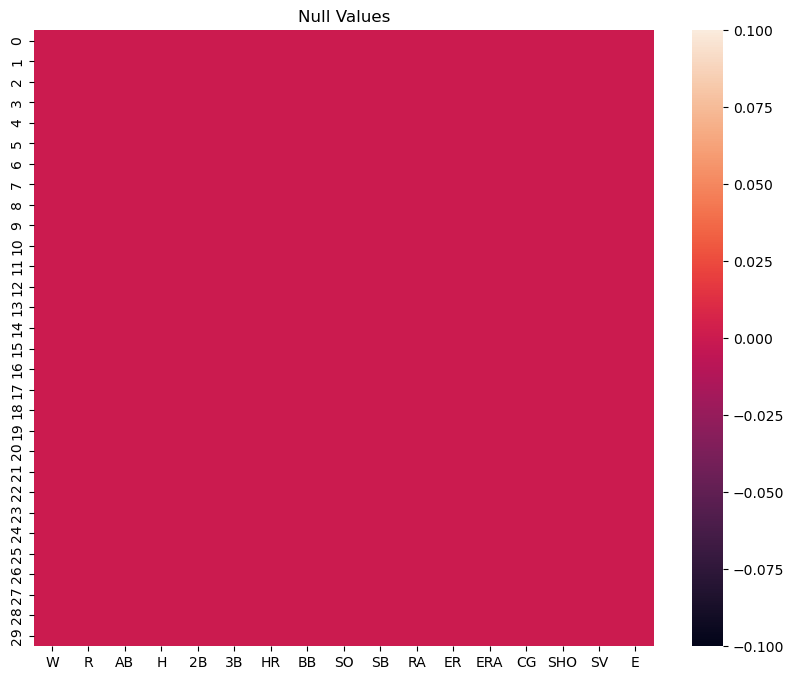

In [27]:
plt.figure(figsize=[10,8])
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

In [7]:
df.info

<bound method DataFrame.info of       W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  \
0    95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2   
1    83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   
2    81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   
3    76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7   
4    74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   
5    93  891  5509  1480  308  17  232  570  1151   88  670  609  3.80   7   
6    87  764  5567  1397  272  19  212  554  1227   63  698  652  4.03   3   
7    81  713  5485  1370  246  20  217  418  1331   44  693  646  4.05   0   
8    80  644  5485  1383  278  32  167  436  1310   87  642  604  3.74   1   
9    78  748  5640  1495  294  33  161  478  1148   71  753  694  4.31   3   
10   88  751  5511  1419  279  32  172  503  1233  101  733  680  4.24   5   
11   86  729  5459  1363  278  2

In [28]:
df['W'].value_counts()

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64

In [29]:
df.describe()

W           R           AB            H          2B  \
count   30.000000   30.000000    30.000000    30.000000   30.000000   
mean    80.966667  688.233333  5516.266667  1403.533333  274.733333   
std     10.453455   58.761754    70.467372    57.140923   18.095405   
min     63.000000  573.000000  5385.000000  1324.000000  236.000000   
25%     74.000000  651.250000  5464.000000  1363.000000  262.250000   
50%     81.000000  689.000000  5510.000000  1382.500000  275.500000   
75%     87.750000  718.250000  5570.000000  1451.500000  288.750000   
max    100.000000  891.000000  5649.000000  1515.000000  308.000000   

              3B          HR          BB          SO          SB          RA  \
count  30.000000   30.000000   30.000000    30.00000   30.000000   30.000000   
mean   31.300000  163.633333  469.100000  1248.20000   83.500000  688.233333   
std    10.452355   31.823309   57.053725   103.75947   22.815225   72.108005   
min    13.000000  100.000000  375.000000   973.00000   44.000000  525.000000   
25%    23.000000  140.250000  428.250000  1157.50000   69.000000  636.250000   
50%    31.000000  158.500000  473.000000  1261.50000   83.500000  695.500000   
75%    39.000000  177.000000  501.250000  1311.50000   96.500000  732.500000   
max    49.000000  232.000000  570.000000  1518.00000  134.000000  844.000000   

               ER        ERA         CG        SHO         SV           E  
count   30.000000  30.000000  30.000000  30.000000  30.000000   30.000000  
mean   635.833333   3.956333   3.466667  11.300000  43.066667   94.333333  
std     70.140786   0.454089   2.763473   4.120177   7.869335   13.958889  
min    478.000000   2.940000   0.000000   4.000000  28.000000   75.000000  
25%    587.250000   3.682500   1.000000   9.000000  37.250000   86.000000  
50%    644.500000   4.025000   3.000000  12.000000  42.000000   91.000000  
75%    679.250000   4.220000   5.750000  13.000000  46.750000   96.750000  
max    799.000000   5.040000  11.000000  21.000000  62.000000  126.000000

C:\Users\DELL\AppData\Local\Temp\ipykernel_7228\3208967187.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], color = 'skyblue')
C:\Users\DELL\AppData\Local\Temp\ipykernel_7228\3208967187.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], color = 'skyblue')
C:\Users\DEL

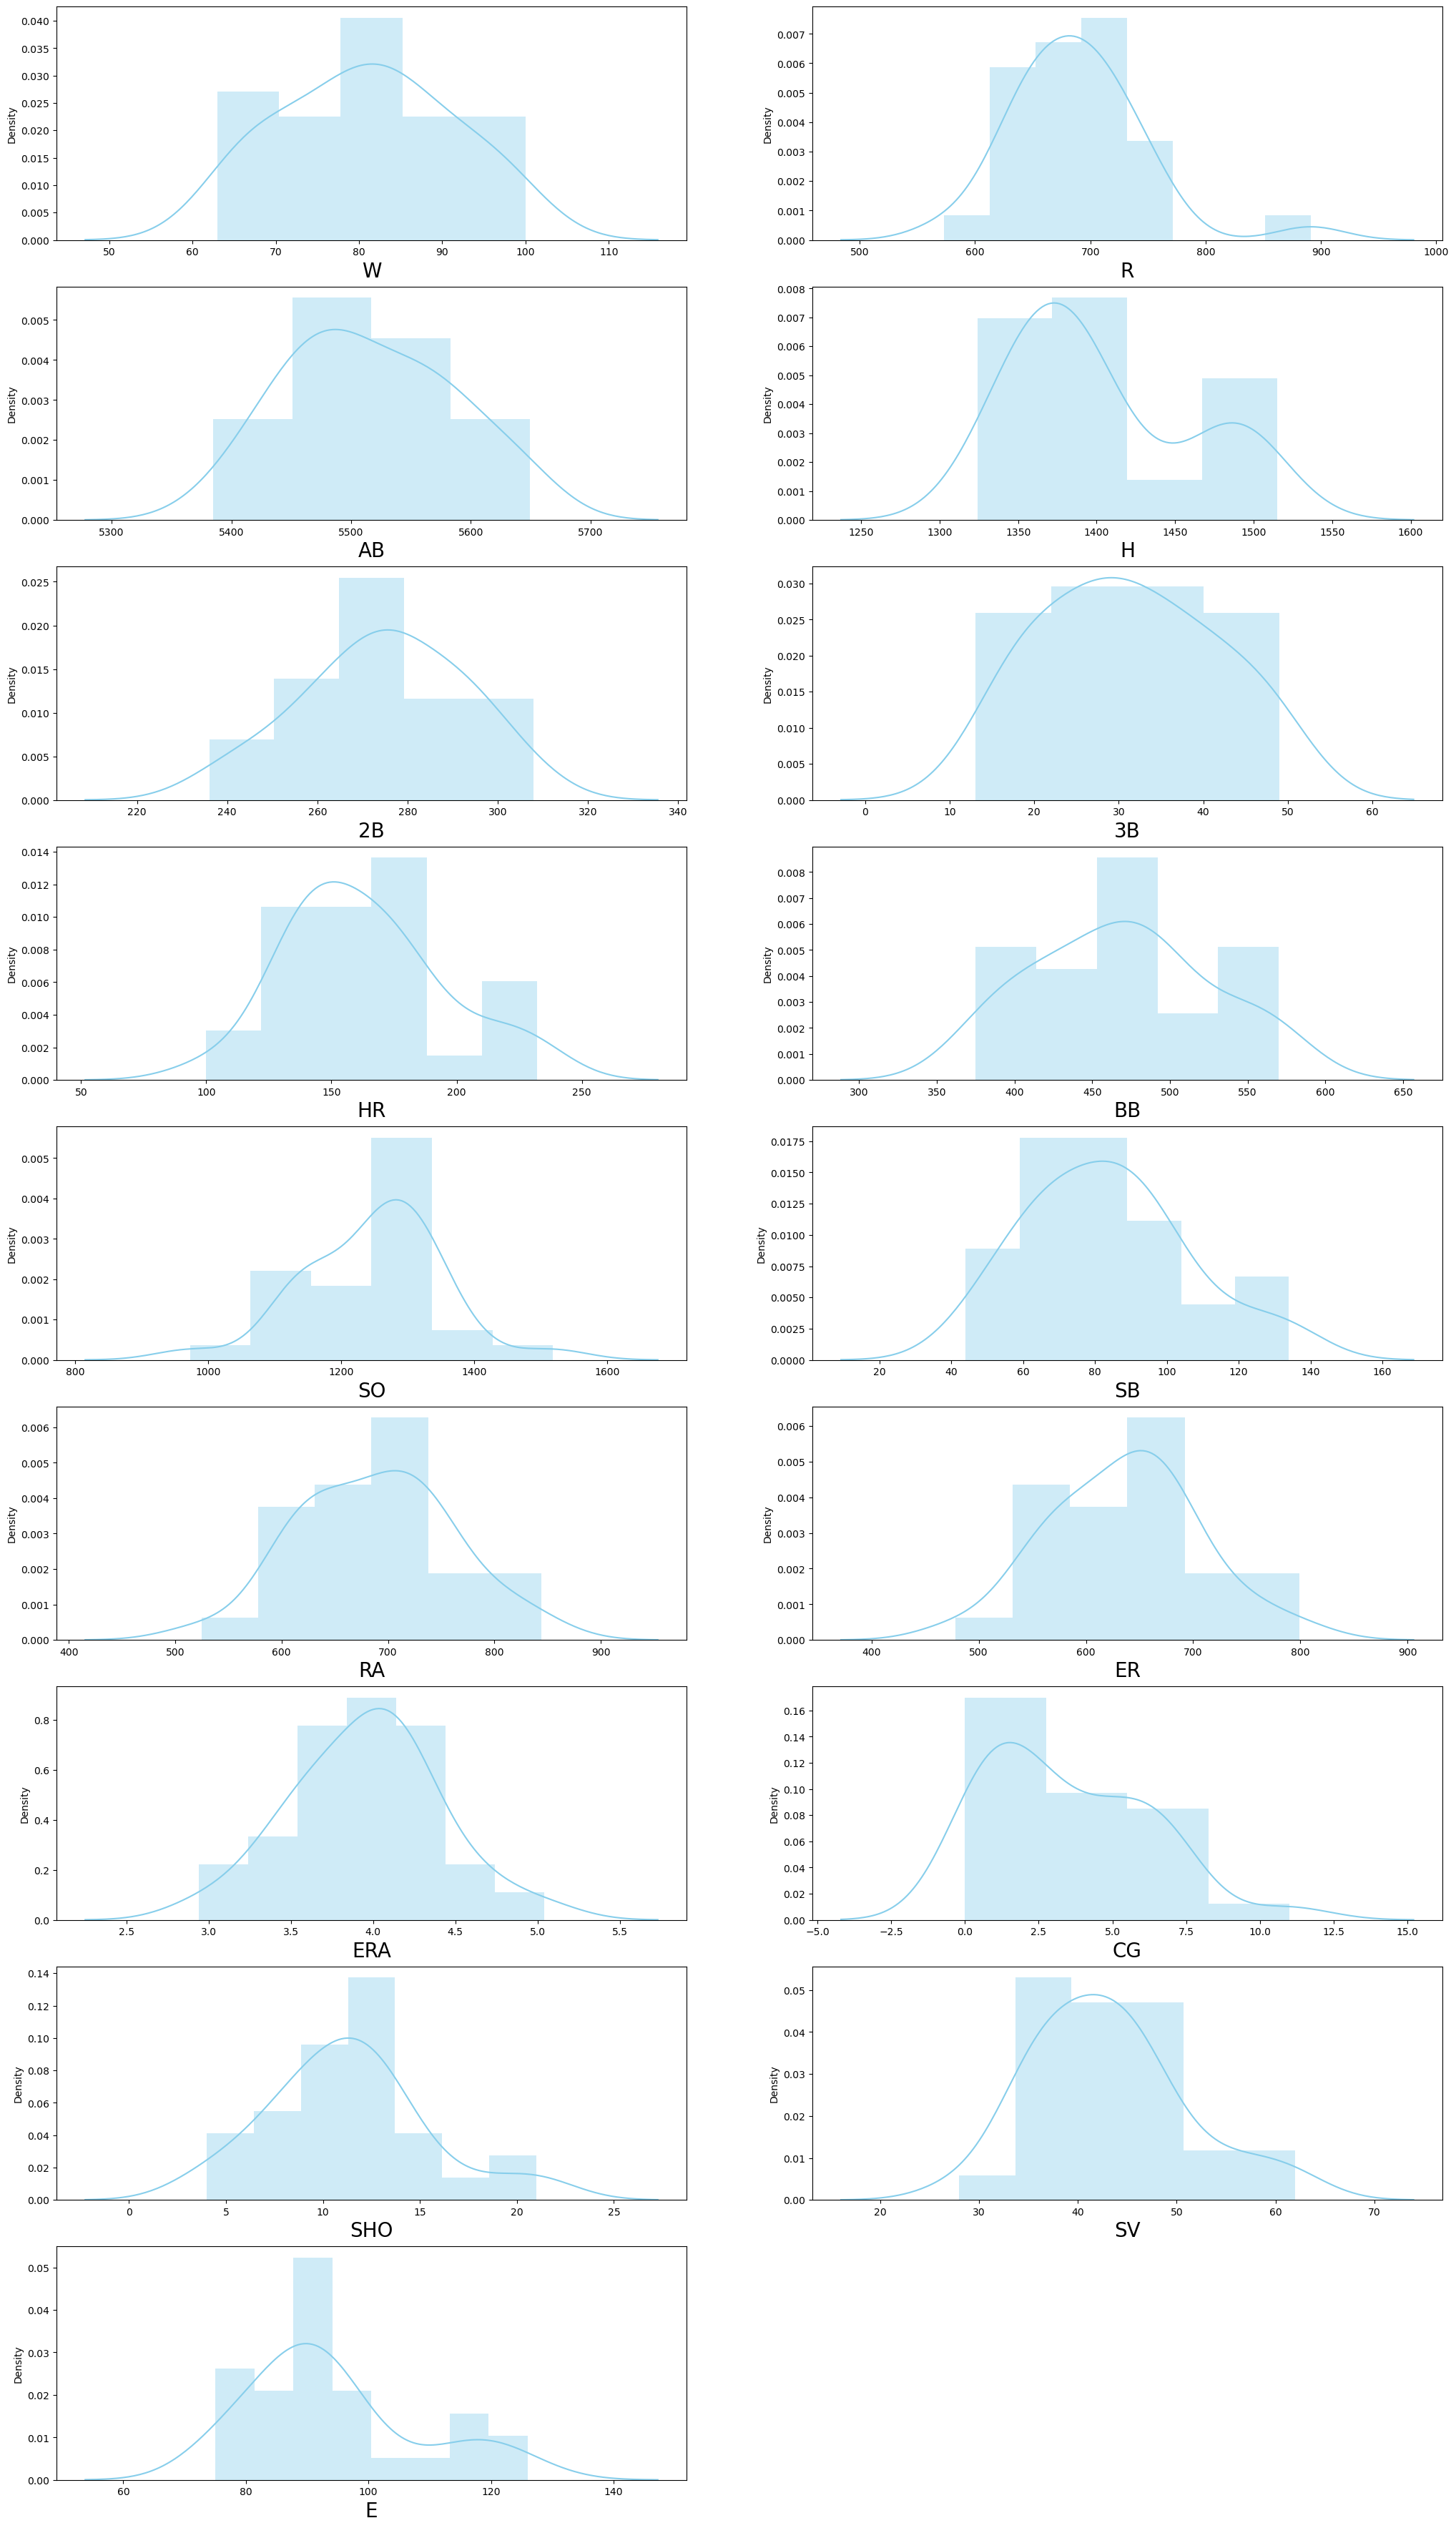

In [30]:
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=17:
        ax = plt.subplot(10,2,plotnumber)
        sns.distplot(df[column], color = 'skyblue')
        plt.xlabel(column,fontsize=20)
        
    plotnumber +=1
plt.show()

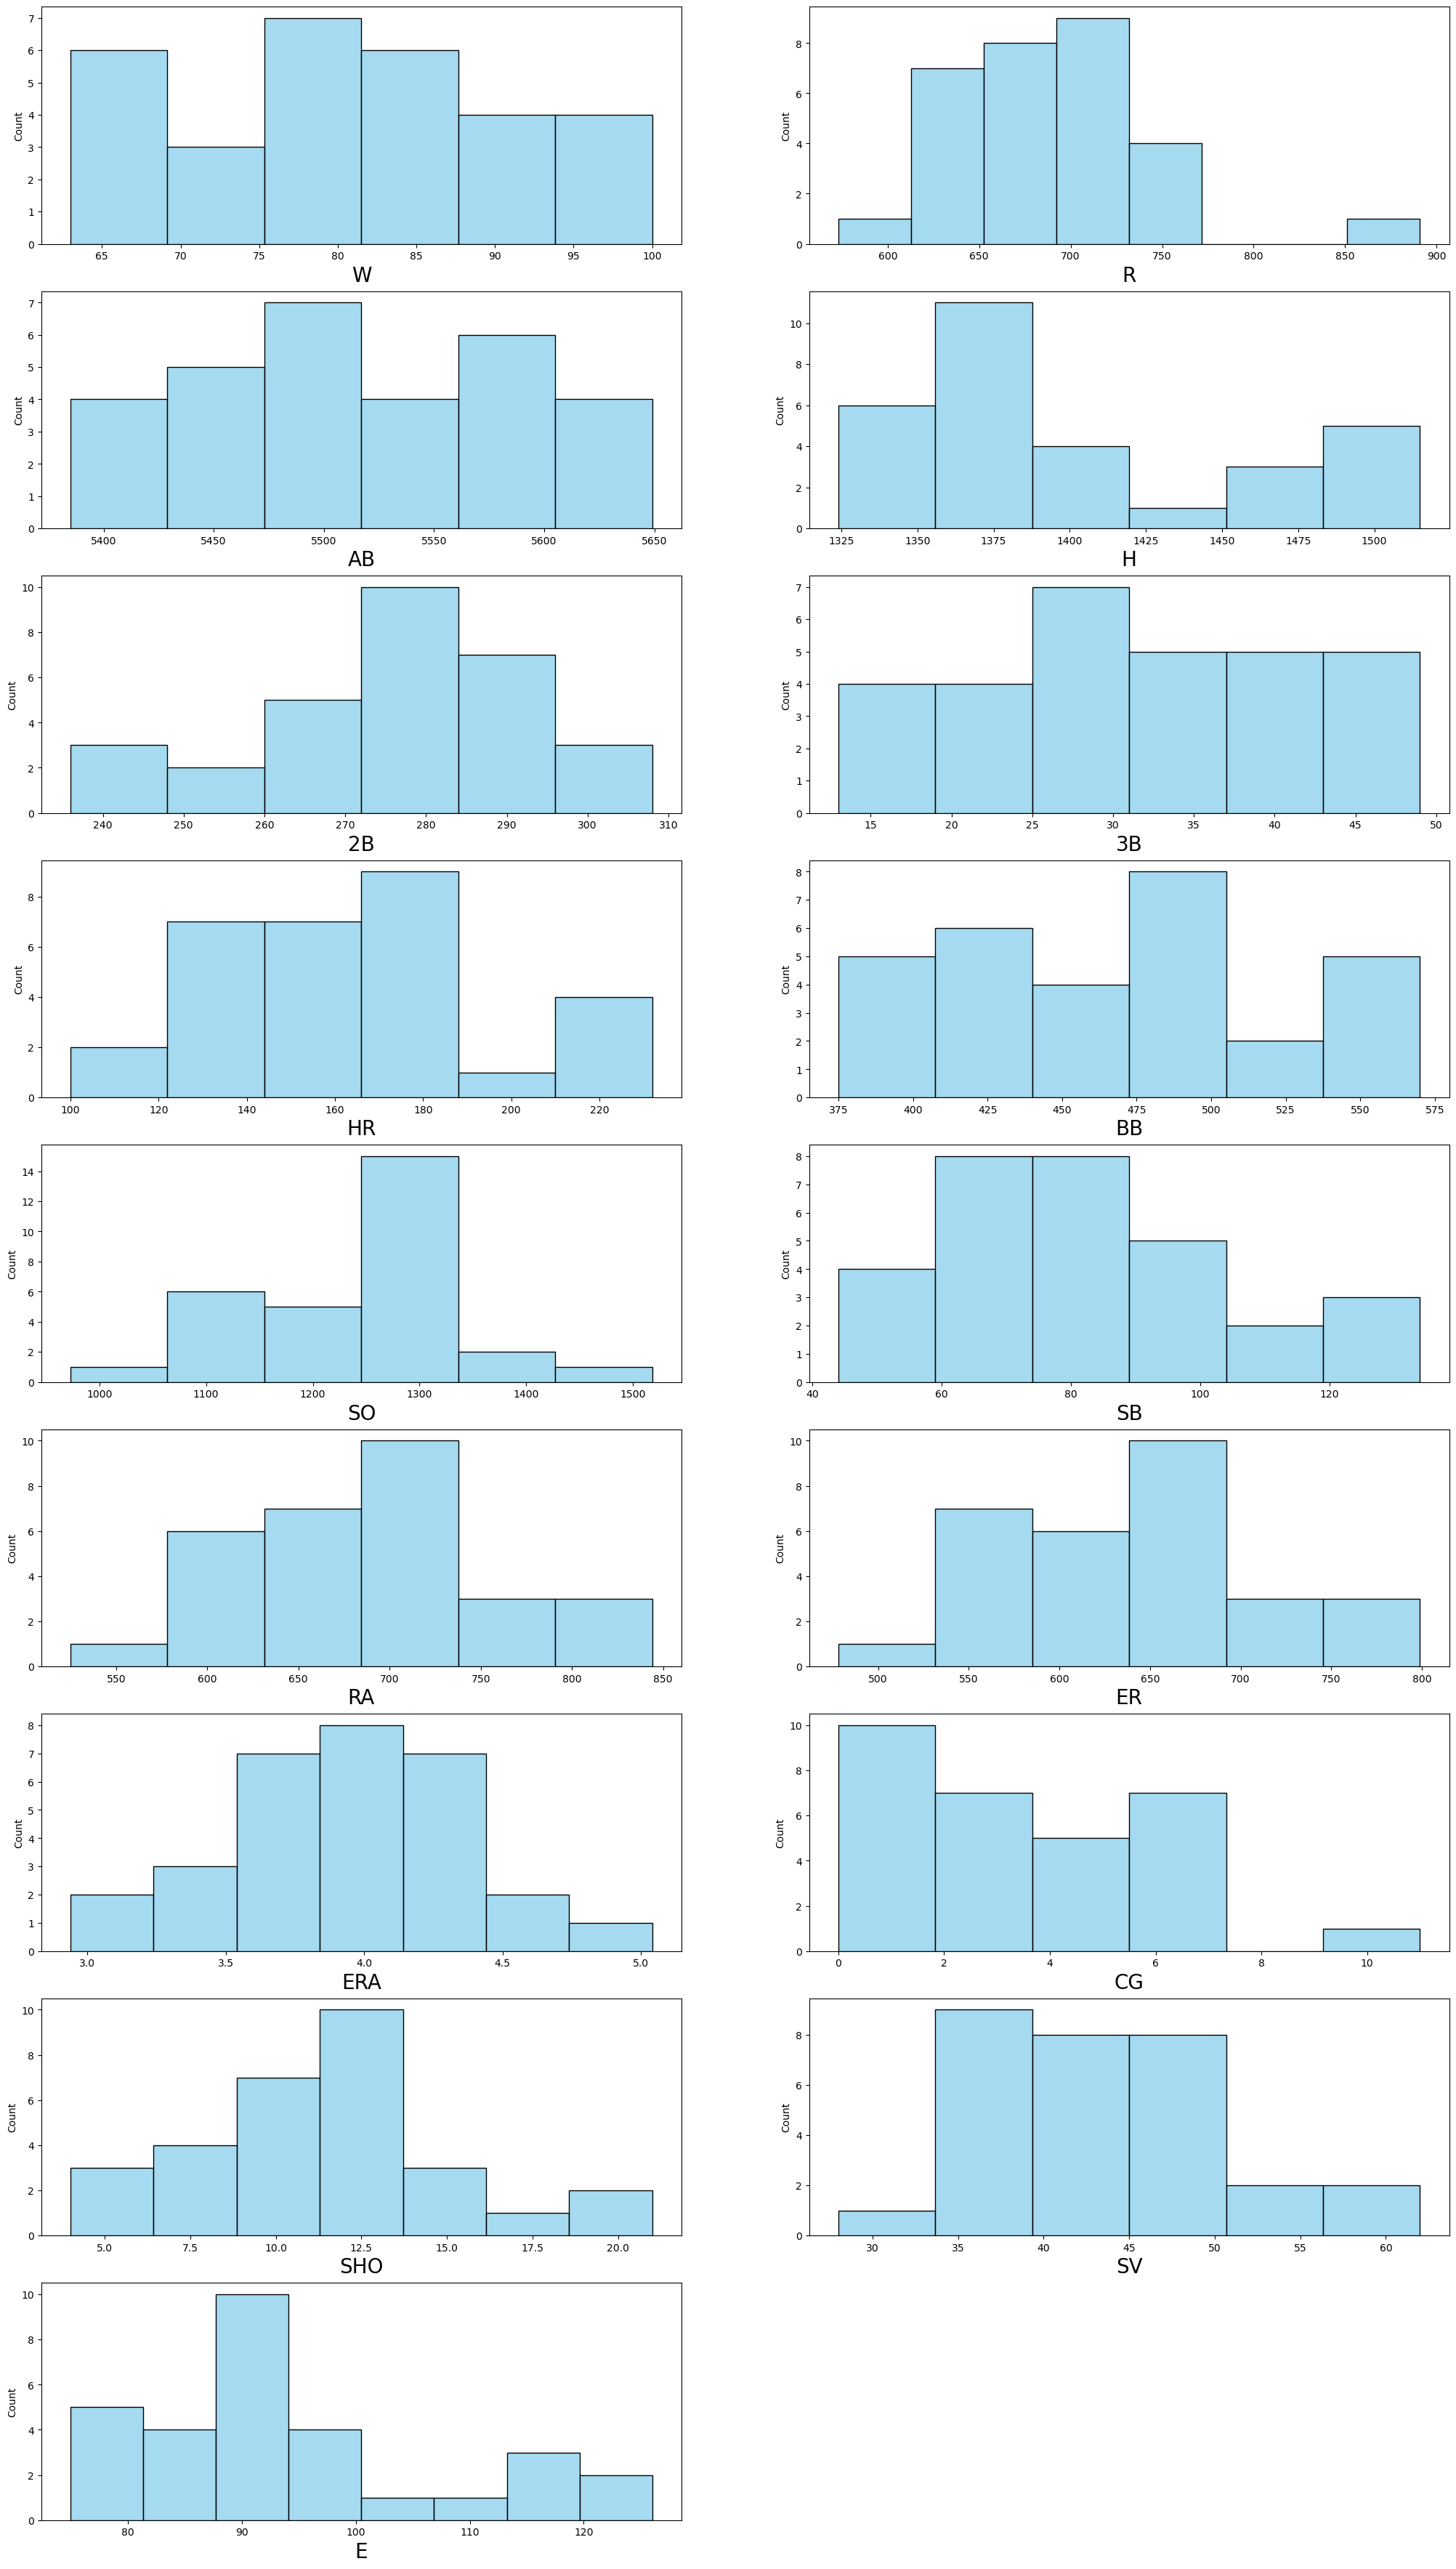

In [31]:
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=17:
        ax = plt.subplot(10,2,plotnumber)
        sns.histplot(df[column], color = 'skyblue')
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
plt.show()

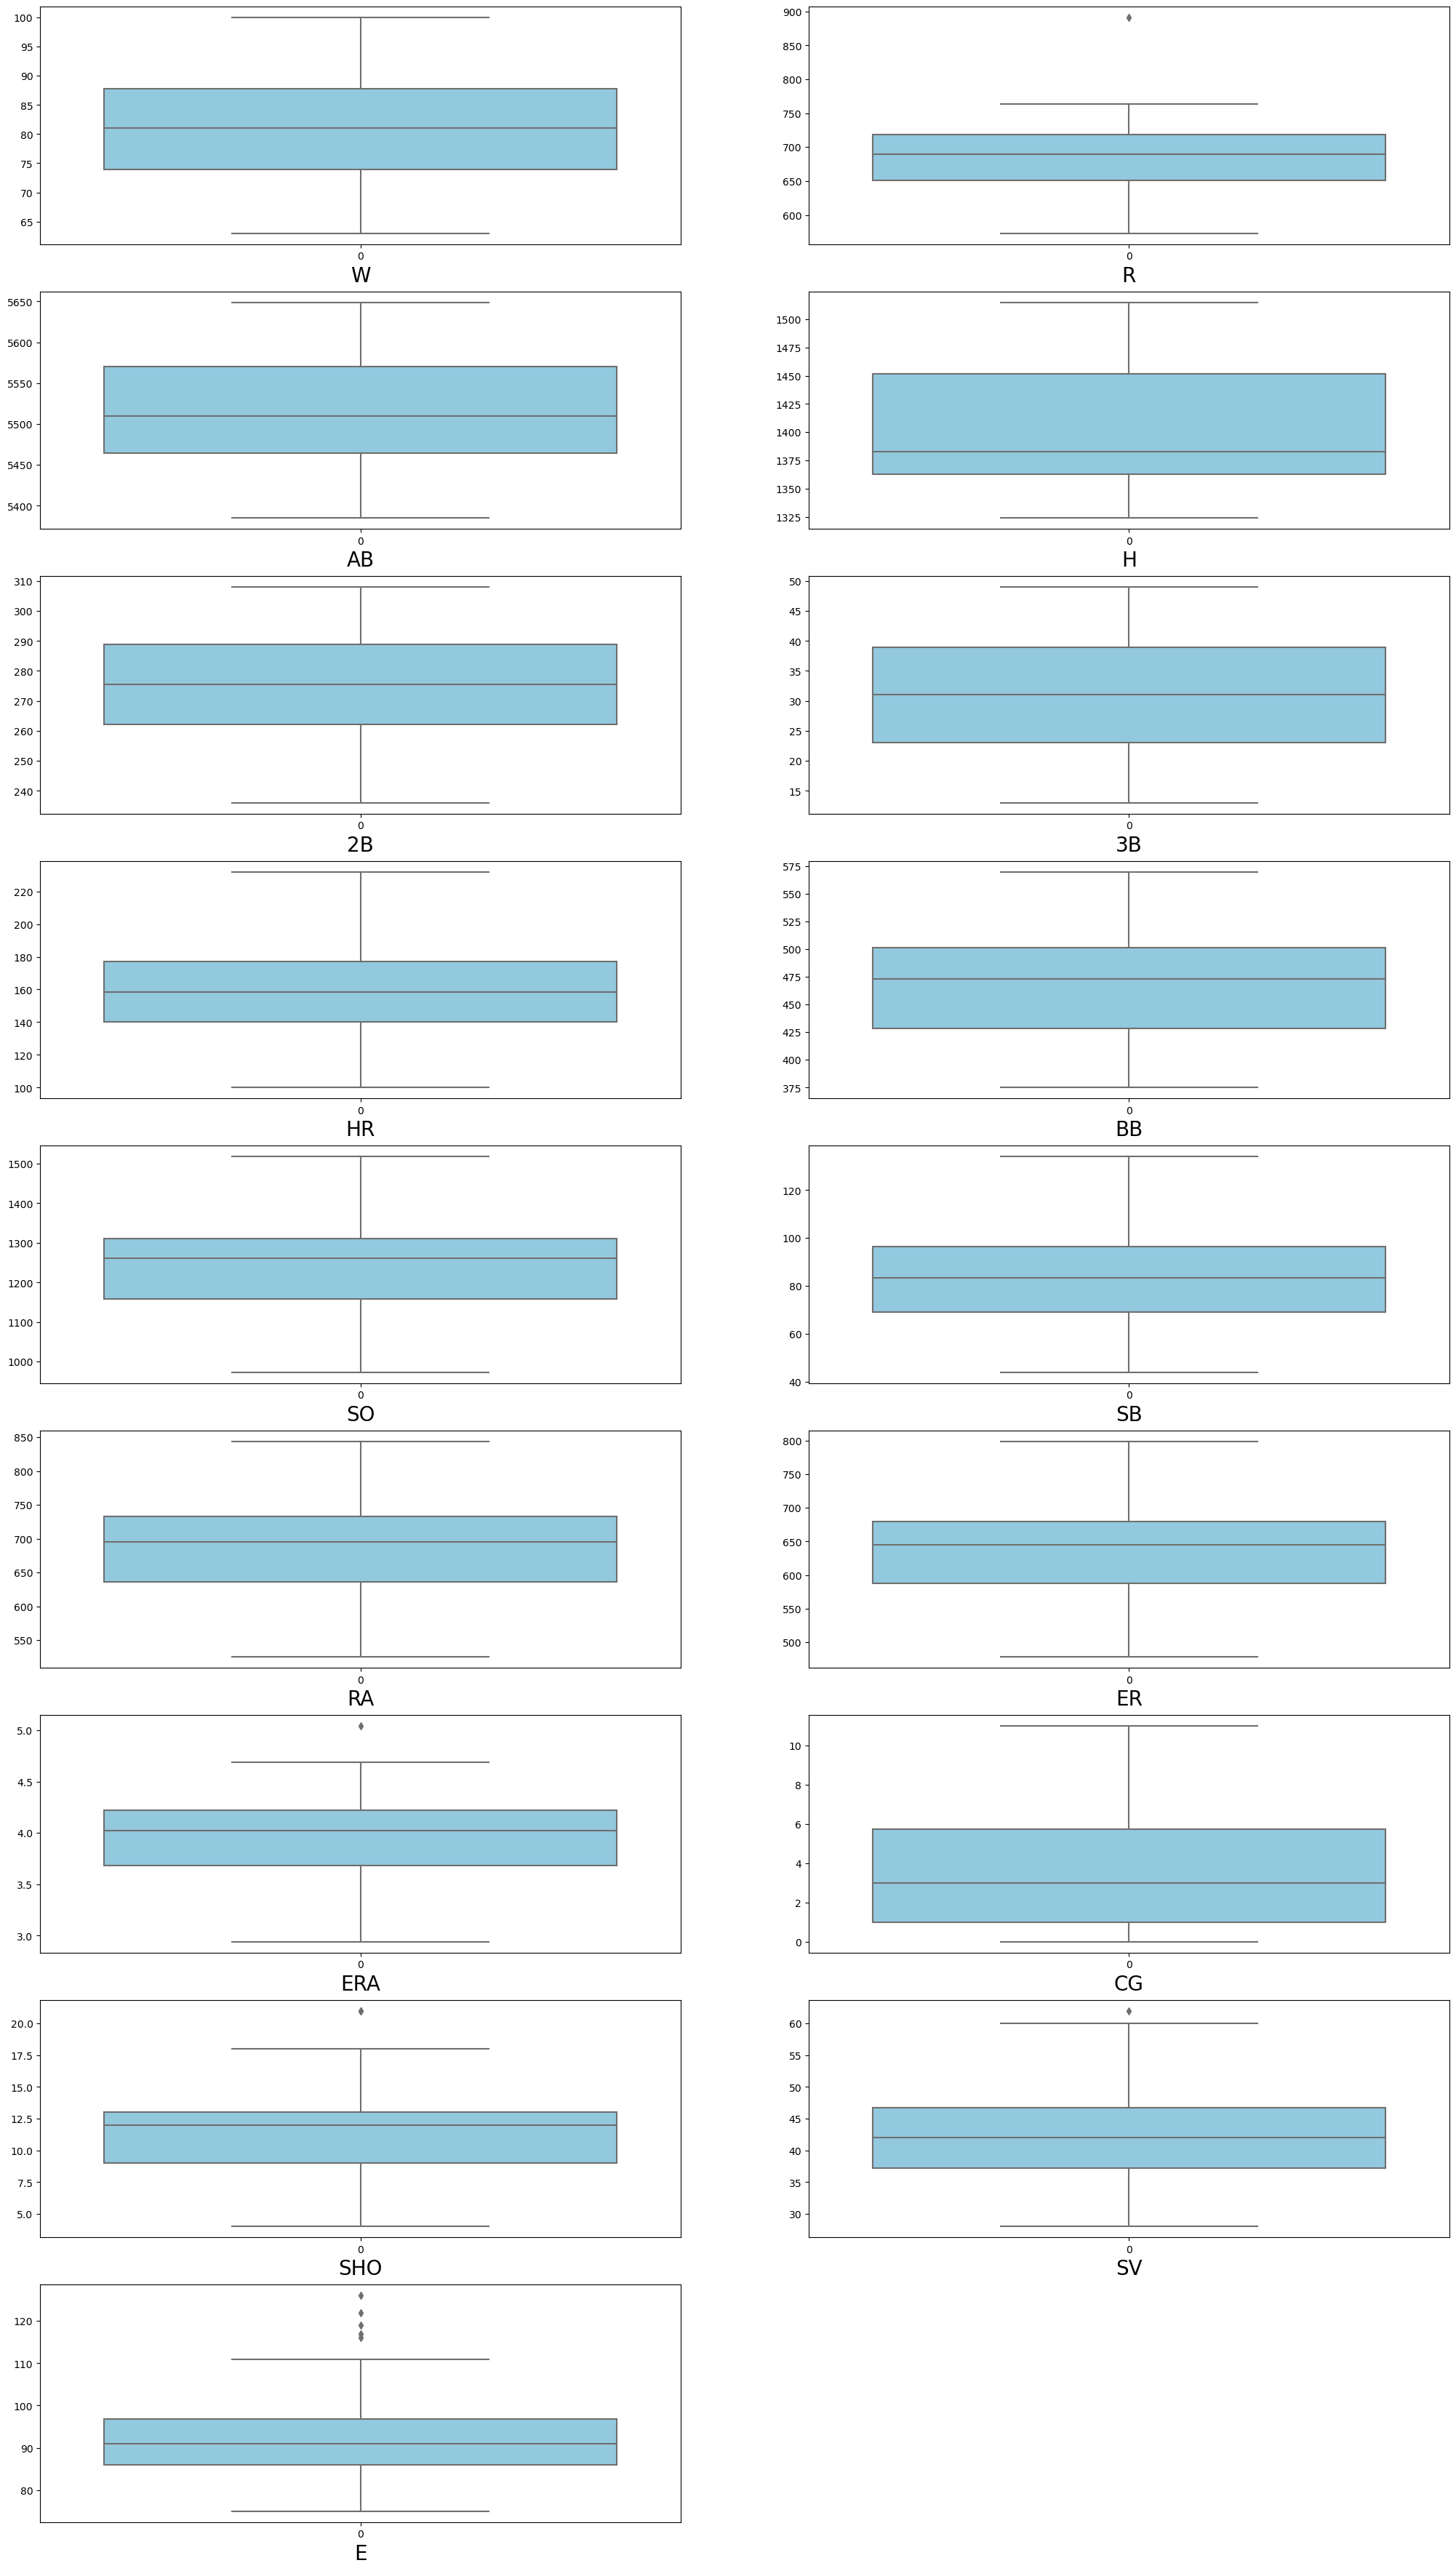

In [32]:
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1
for column in df:
    if plotnumber <=17:
        ax = plt.subplot(10,2,plotnumber)
        sns.boxplot(df[column], color = 'skyblue')
        plt.xlabel(column,fontsize=20)
        
    plotnumber +=1
plt.show()

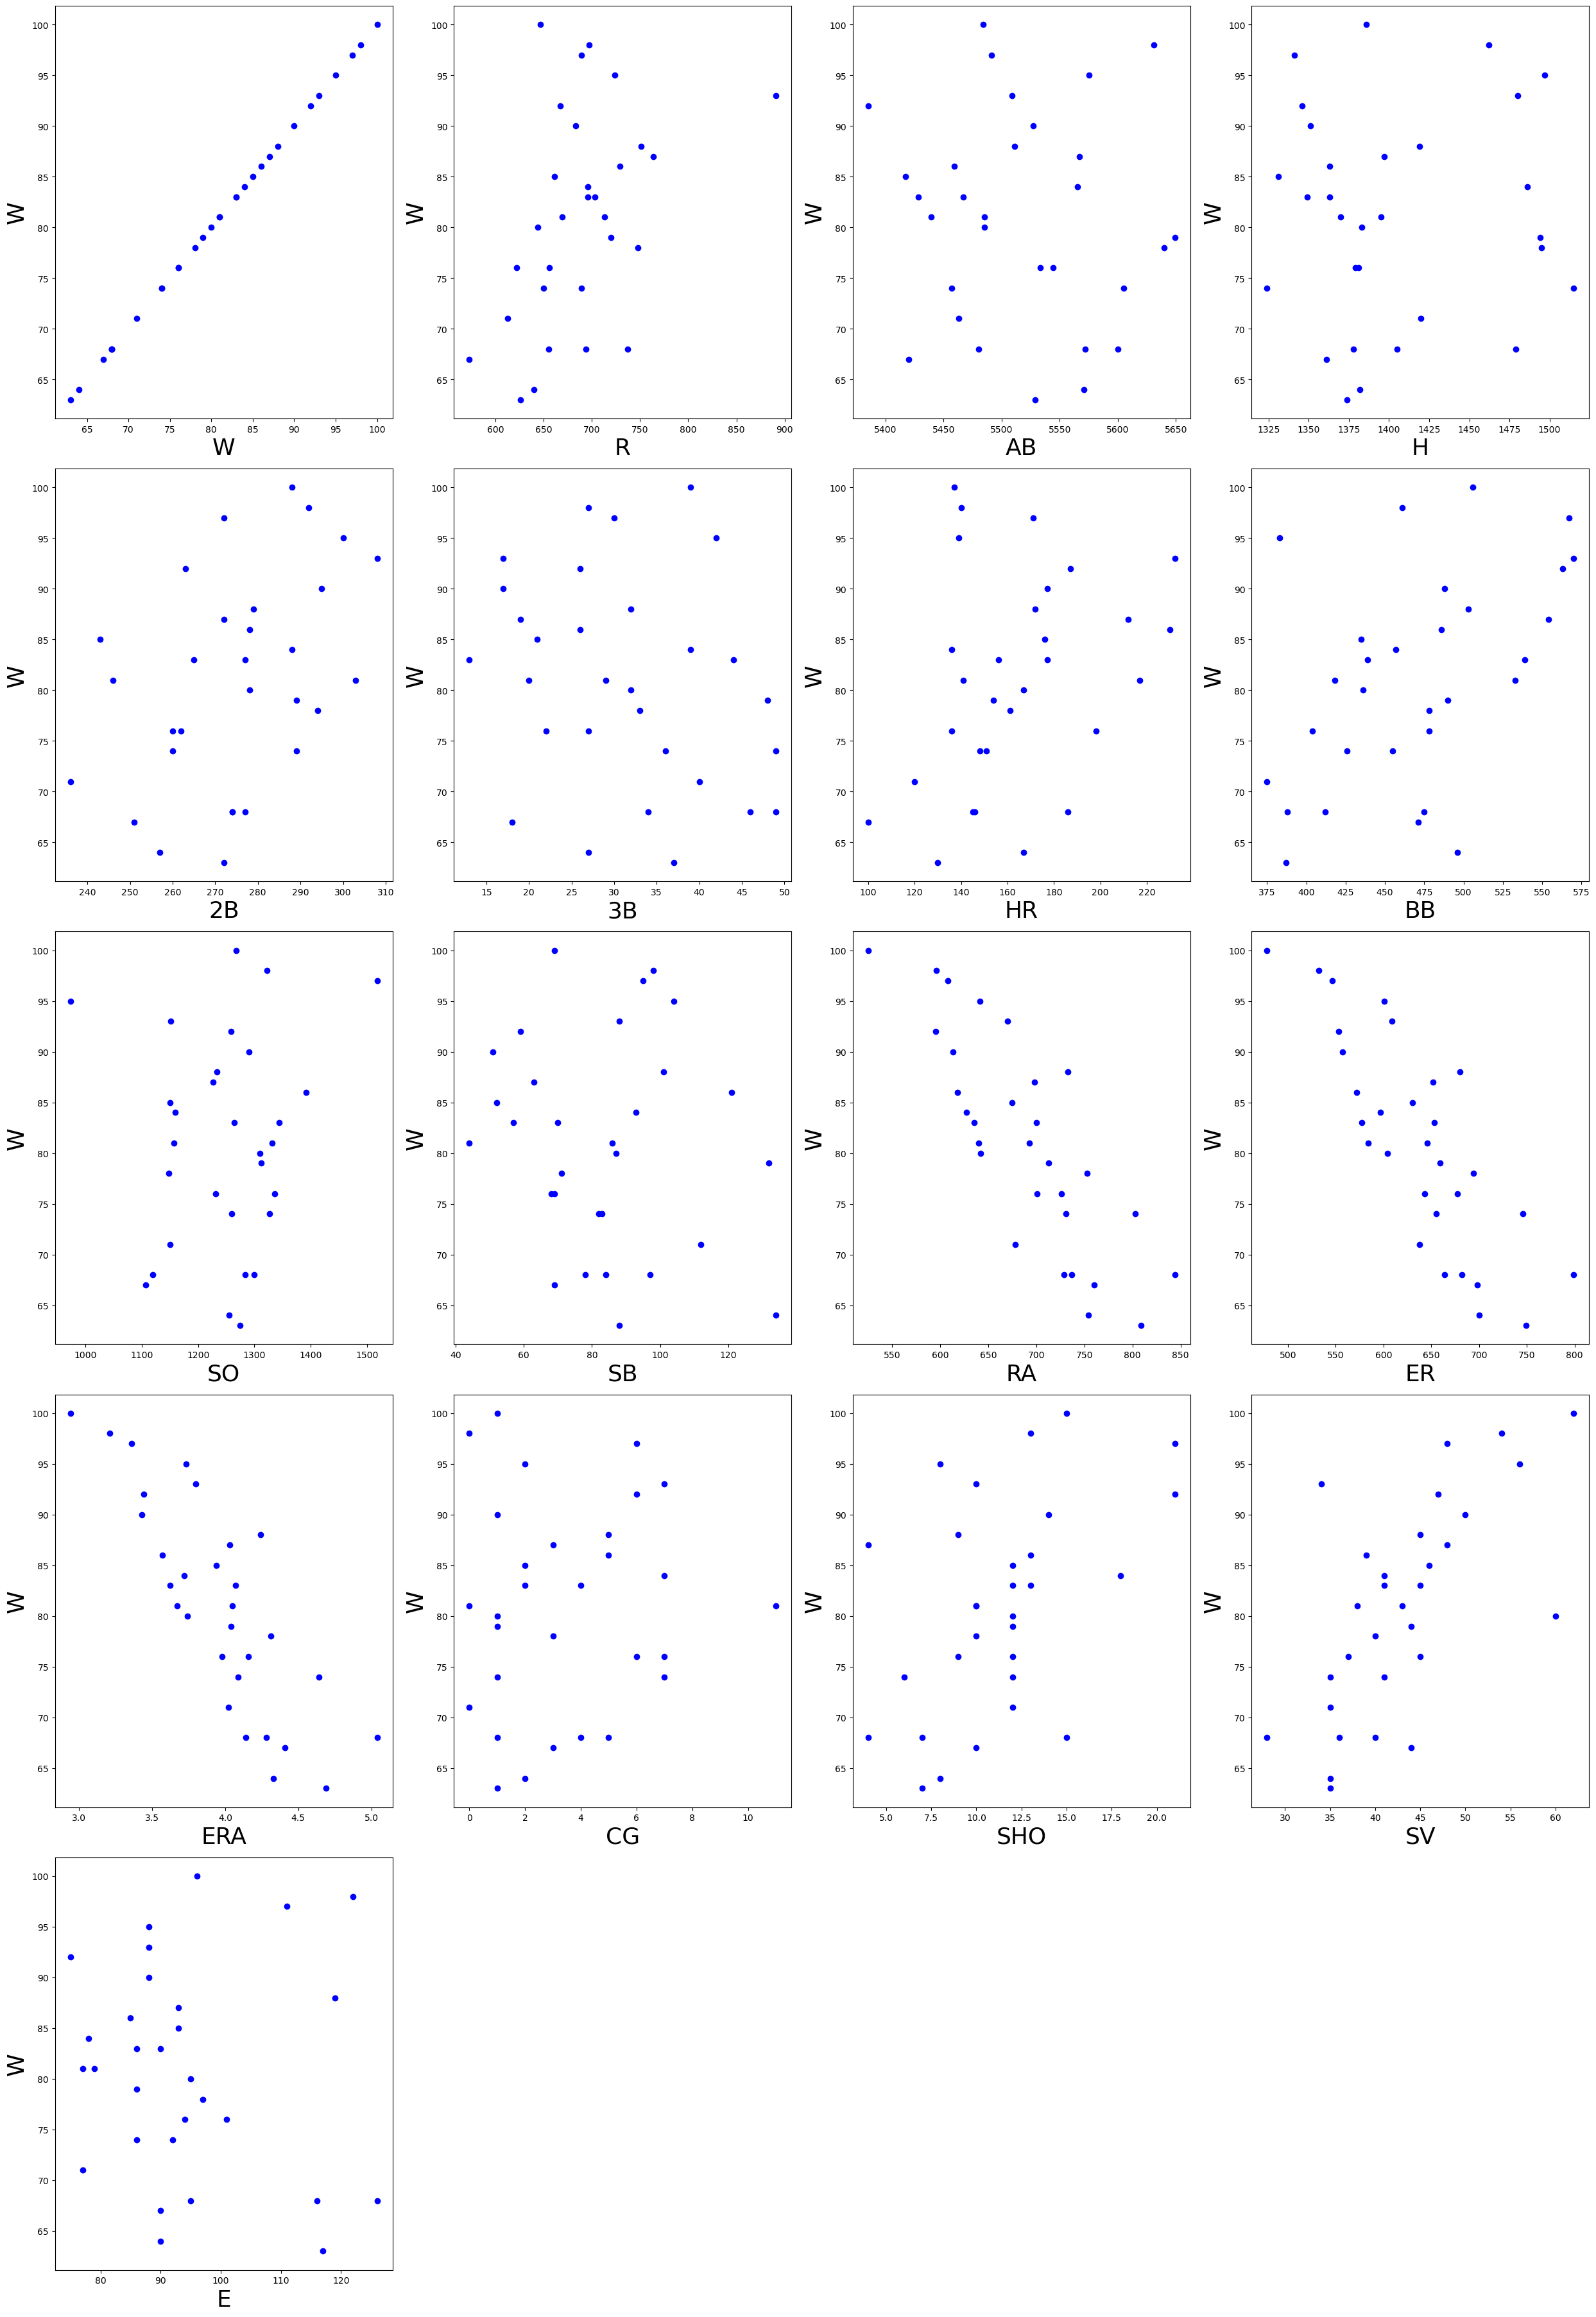

In [33]:
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=20:
        ax = plt.subplot(7,4,plotnumber)
        plt.scatter(df[column],df['W'], color='b')
        plt.xlabel(column,fontsize=26)
        plt.ylabel('W', fontsize=26)
    plotnumber += 1
plt.tight_layout()
    

In [34]:
plt.figure(figsize = (25,20), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=20:
        plt.figure(figsize = (10,6))
        sns.regplot(df[column], df['W'])
        plt.title('Scatter Plot for Wins vs other attributes')
        plt.xlabel(column)
        plt.ylabel('W')
        
plt.tight_layout()

TypeError: regplot() takes from 0 to 1 positional arguments but 2 were given

<Figure size 2500x2000 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

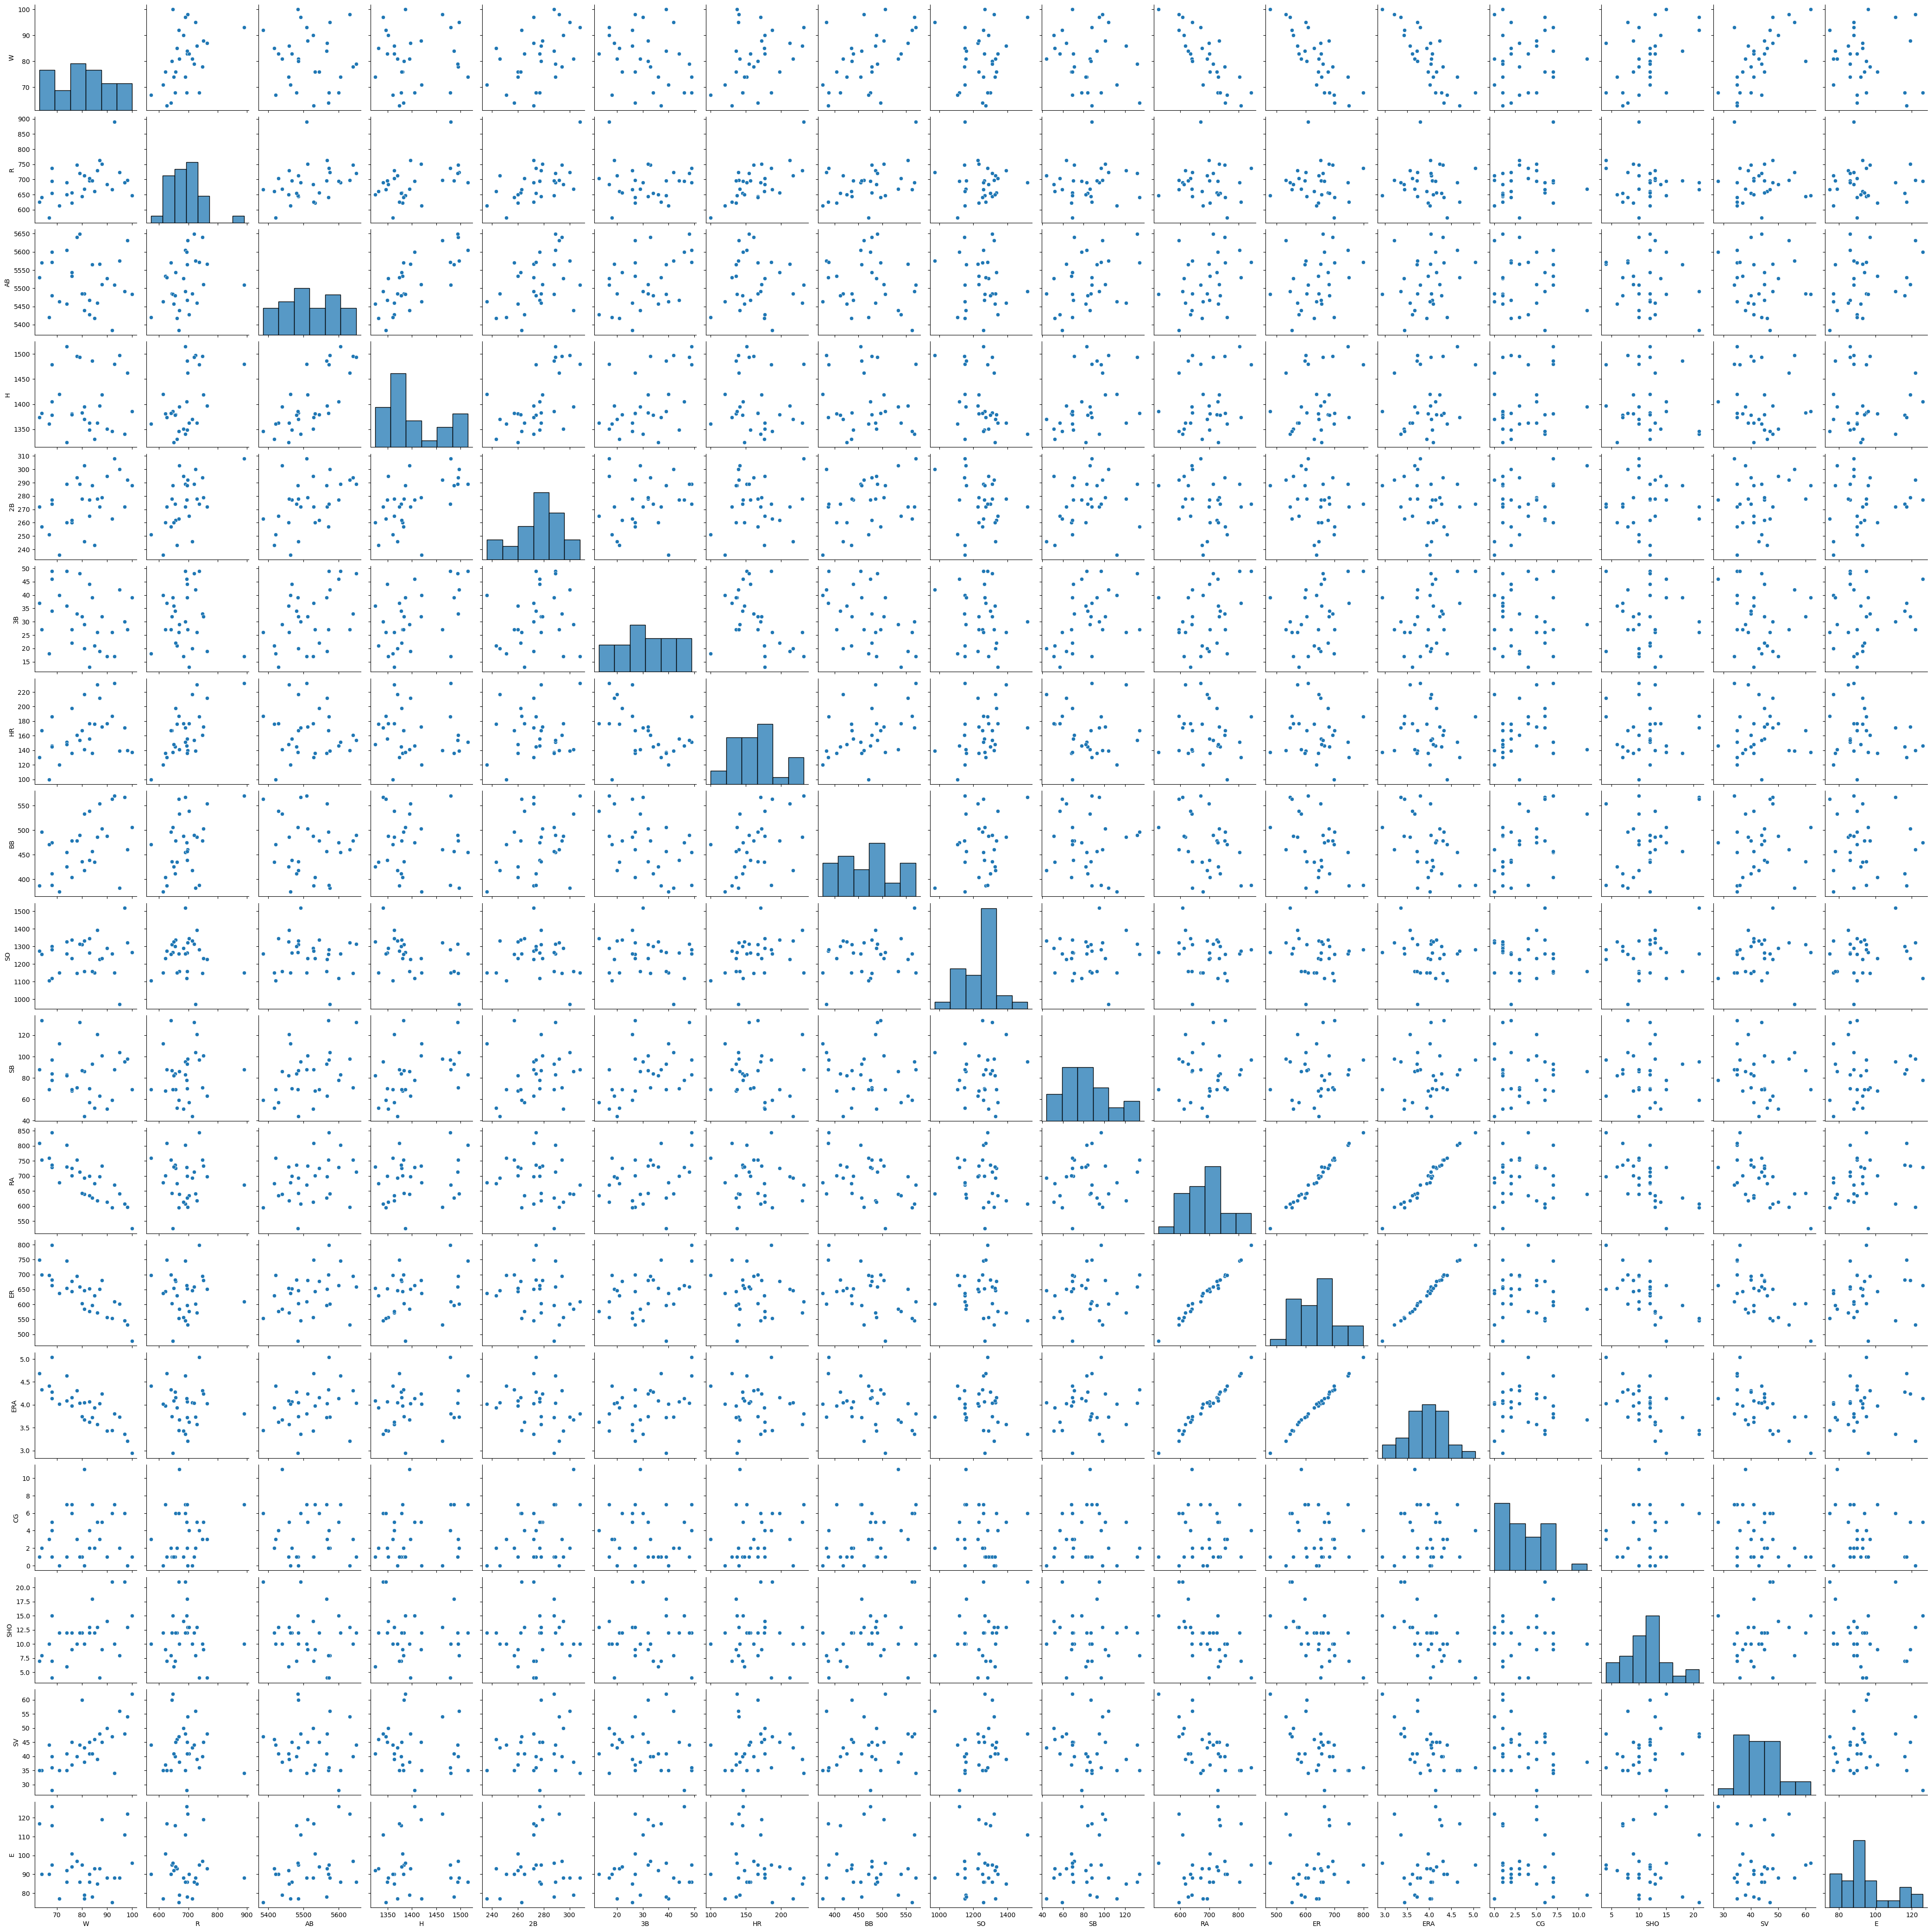

In [35]:
sns.pairplot(df)
plt.show()

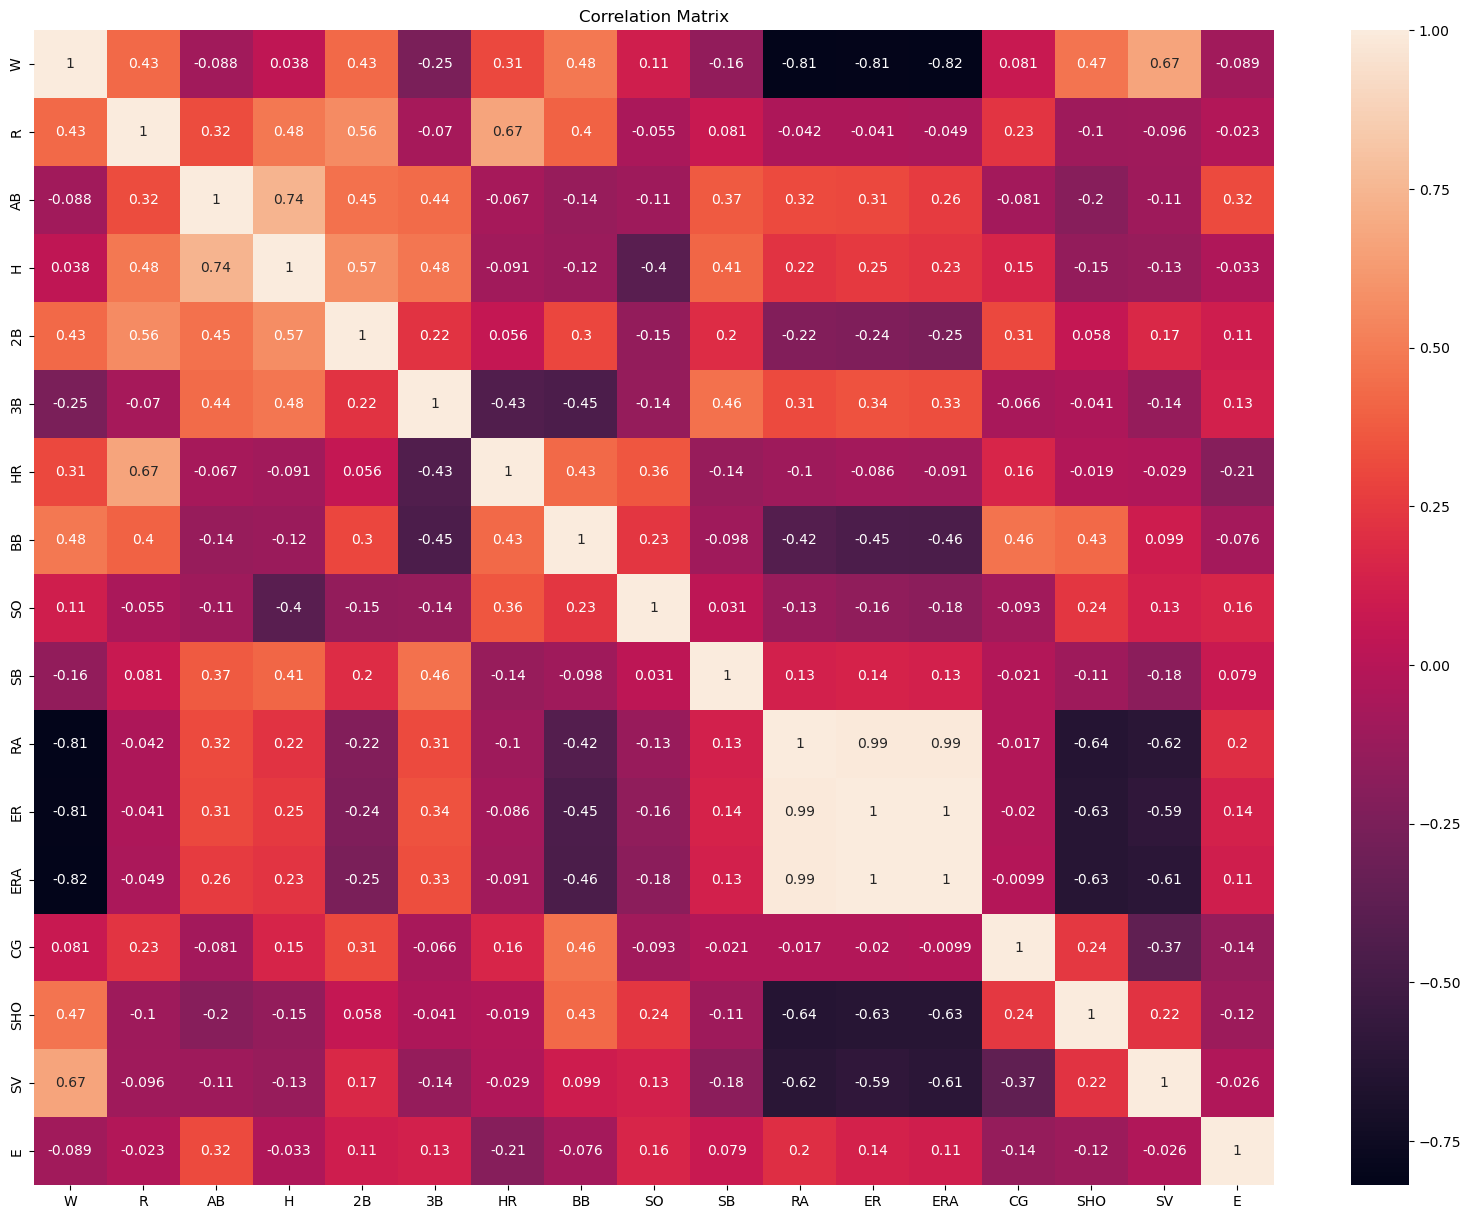

In [36]:
plt.figure(figsize = [20, 15])
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation Matrix')
plt.show()

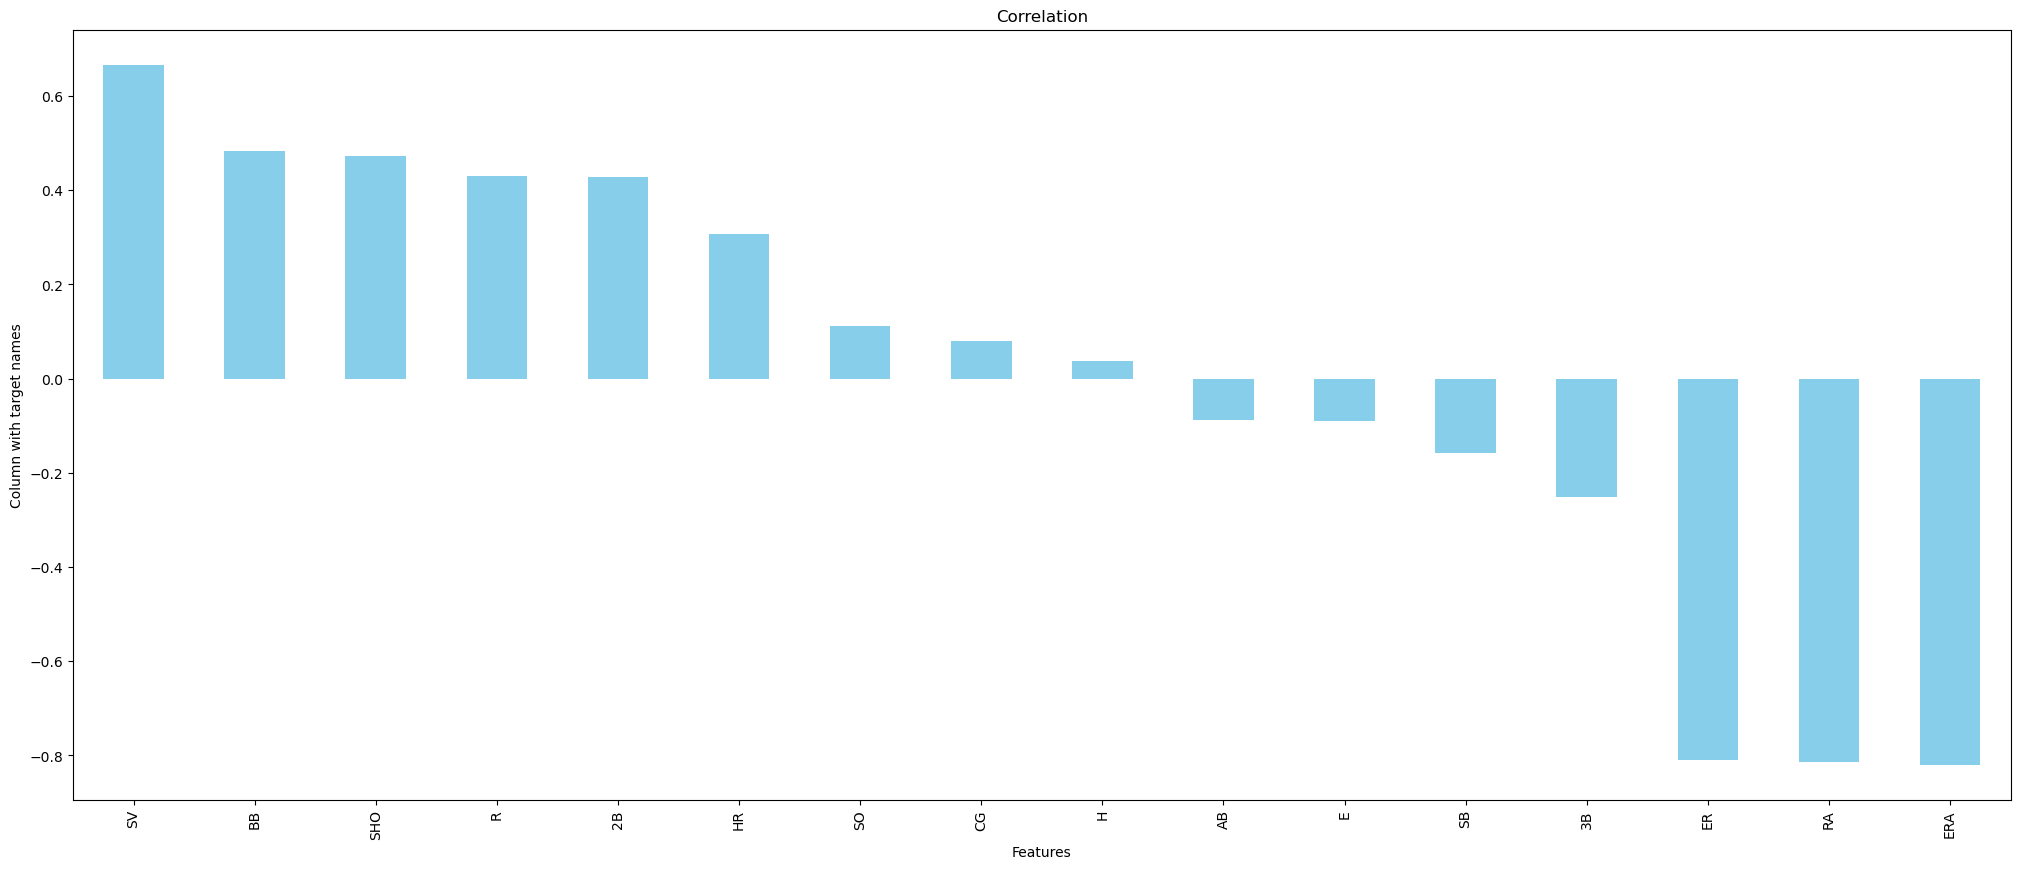

In [37]:
plt.figure(figsize =(25, 10))
df.corr()['W'].sort_values(ascending = False).drop(['W']).plot(kind ='bar', color ='skyblue')
plt.xlabel('Features')
plt.ylabel('Column with target names')
plt.title('Correlation')
plt.show()

In [38]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

<Axes: >

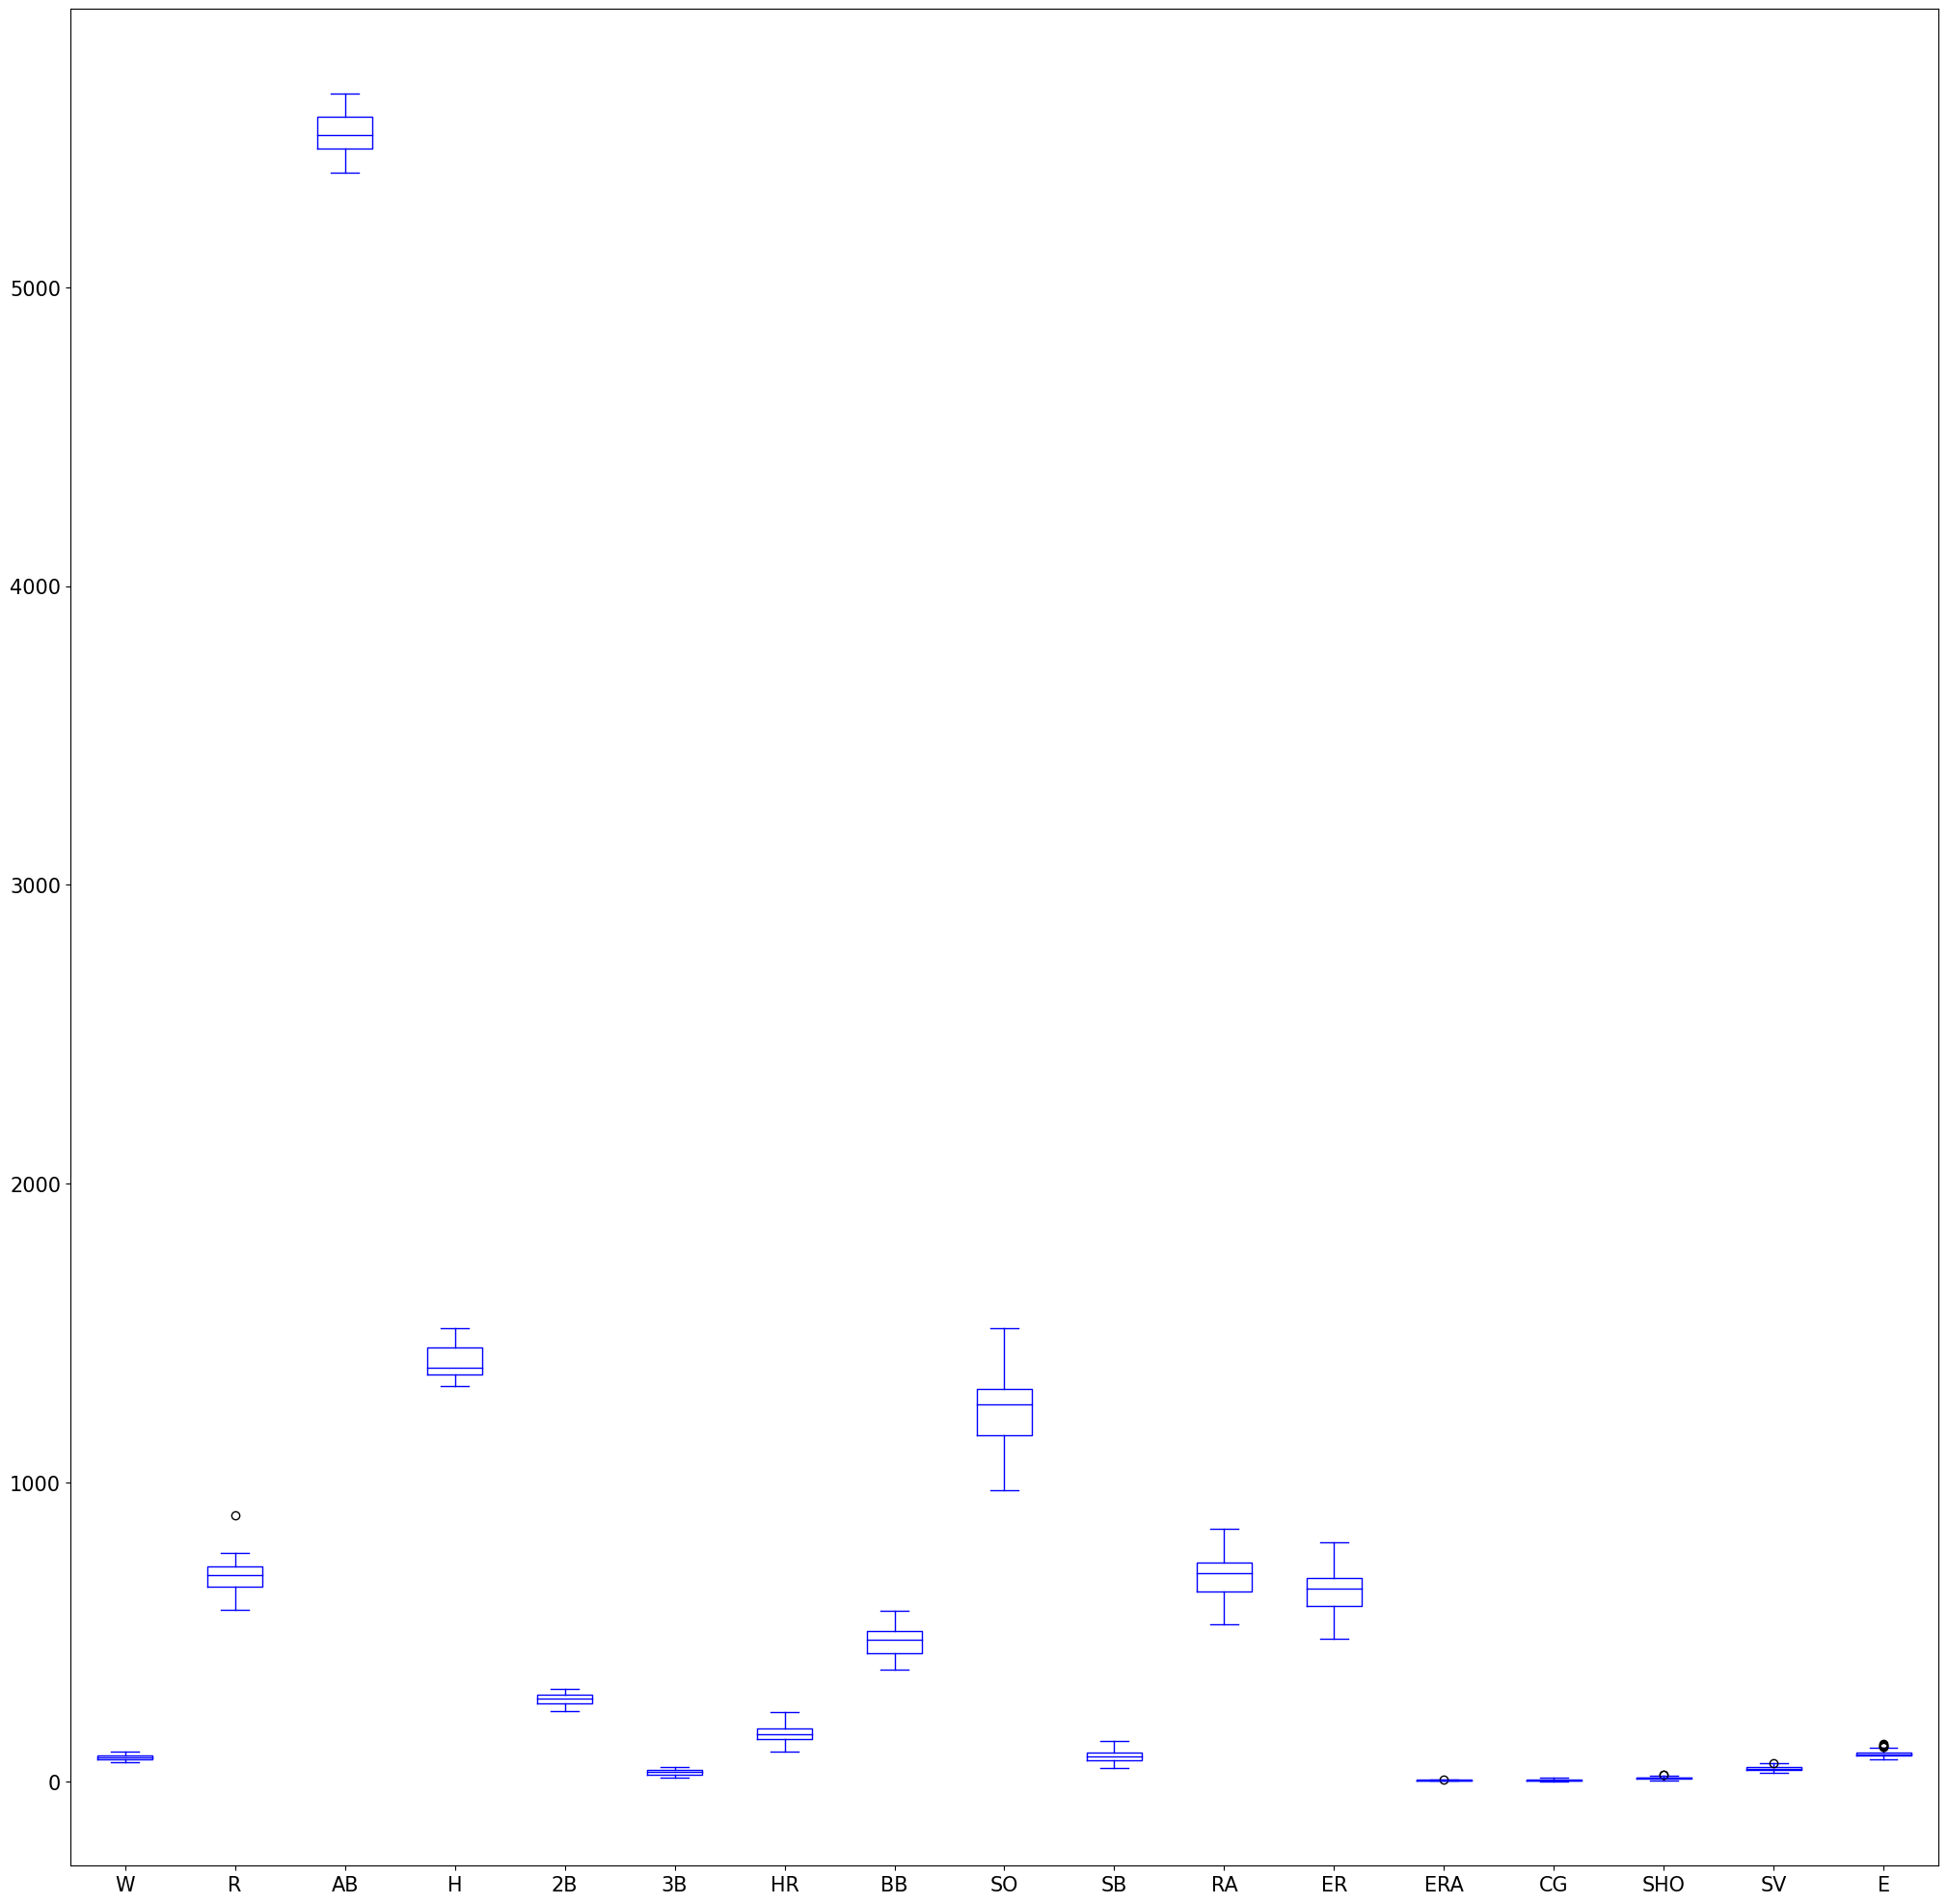

In [39]:
df.plot(kind='box',fontsize=15,figsize=(25,25),color='b')

In [40]:
features=df[['R','ERA','SHO','SV','E']]

In [41]:
from scipy.stats import zscore
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new

W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  \
0    95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2   
1    83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   
2    81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   
3    76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7   
4    74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   
6    87  764  5567  1397  272  19  212  554  1227   63  698  652  4.03   3   
7    81  713  5485  1370  246  20  217  418  1331   44  693  646  4.05   0   
8    80  644  5485  1383  278  32  167  436  1310   87  642  604  3.74   1   
9    78  748  5640  1495  294  33  161  478  1148   71  753  694  4.31   3   
10   88  751  5511  1419  279  32  172  503  1233  101  733  680  4.24   5   
11   86  729  5459  1363  278  26  230  486  1392  121  618  572  3.57   5   
12   85  661  5417  1331  243  21  176  435  1150   52  675  630  3.94   2   
13   76  656  5544  1379  262  22  198  478  1336   69  726  677  4.16   6   
14   68  694  5600  1405  277  46  146  475  1119   78  729  664  4.14   5   
15  100  647  5484  1386  288  39  137  506  1267   69  525  478  2.94   1   
16   98  697  5631  1462  292  27  140  461  1322   98  596  532  3.21   0   
17   97  689  5491  1341  272  30  171  567  1518   95  608  546  3.36   6   
18   68  655  5480  1378  274  34  145  412  1299   84  737  682  4.28   1   
19   64  640  5571  1382  257  27  167  496  1255  134  754  700  4.33   2   
20   90  683  5527  1351  295  17  177  488  1290   51  613  557  3.43   1   
21   83  703  5428  1363  265  13  177  539  1344   57  635  577  3.62   4   
22   71  613  5463  1420  236  40  120  375  1150  112  678  638  4.02   0   
23   67  573  5420  1361  251  18  100  471  1107   69  760  698  4.41   3   
24   63  626  5529  1374  272  37  130  387  1274   88  809  749  4.69   1   
25   92  667  5385  1346  263  26  187  563  1258   59  595  553  3.44   6   
26   84  696  5565  1486  288  39  136  457  1159   93  627  597  3.72   7   
27   79  720  5649  1494  289  48  154  490  1312  132  713  659  4.04   1   
28   74  650  5457  1324  260  36  148  426  1327   82  731  655  4.09   1   
29   68  737  5572  1479  274  49  186  388  1283   97  844  799  5.04   4   

    SHO  SV    E  
0     8  56   88  
1    12  45   86  
2    10  38   79  
3     9  37  101  
4    12  35   86  
6     4  48   93  
7    10  43   77  
8    12  60   95  
9    10  40   97  
10    9  45  119  
11   13  39   85  
12   12  46   93  
13   12  45   94  
14   15  28  126  
15   15  62   96  
16   13  54  122  
17   21  48  111  
18    7  40  116  
19    8  35   90  
20   14  50   88  
21   13  41   90  
22   12  35   77  
23   10  44   90  
24    7  35  117  
25   21  47   75  
26   18  41   78  
27   12  44   86  
28    6  41   92  
29    4  36   95

In [42]:
df_new.shape

(29, 17)

In [43]:
df.shape

(30, 17)

In [44]:
Dataloss = (((30-29)/30)*100)

In [45]:
Dataloss

3.3333333333333335

In [46]:
df_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

In [47]:
skew_features=["H","CG","SHO","SV","E"]

In [48]:
df_new["H"]=np.log1p(df_new["H"])

C:\Users\DELL\AppData\Local\Temp\ipykernel_7228\1312890887.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["H"]=np.log1p(df_new["H"])


In [49]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [50]:
df_new[['E','SHO','SV','CG']] = scaler.fit_transform(df_new[['E','SHO','SV','CG']].values)

C:\Users\DELL\AppData\Local\Temp\ipykernel_7228\1091504857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[['E','SHO','SV','CG']] = scaler.fit_transform(df_new[['E','SHO','SV','CG']].values)


In [51]:
df_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.738455
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.045947
SHO    0.000529
SV    -0.000925
E      0.065585
dtype: float64

C:\Users\DELL\AppData\Local\Temp\ipykernel_7228\4275284931.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[column])
C:\Users\DELL\AppData\Local\Temp\ipykernel_7228\4275284931.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[column])
C:\Users\DELL\AppData\Local\Temp\ipykernel

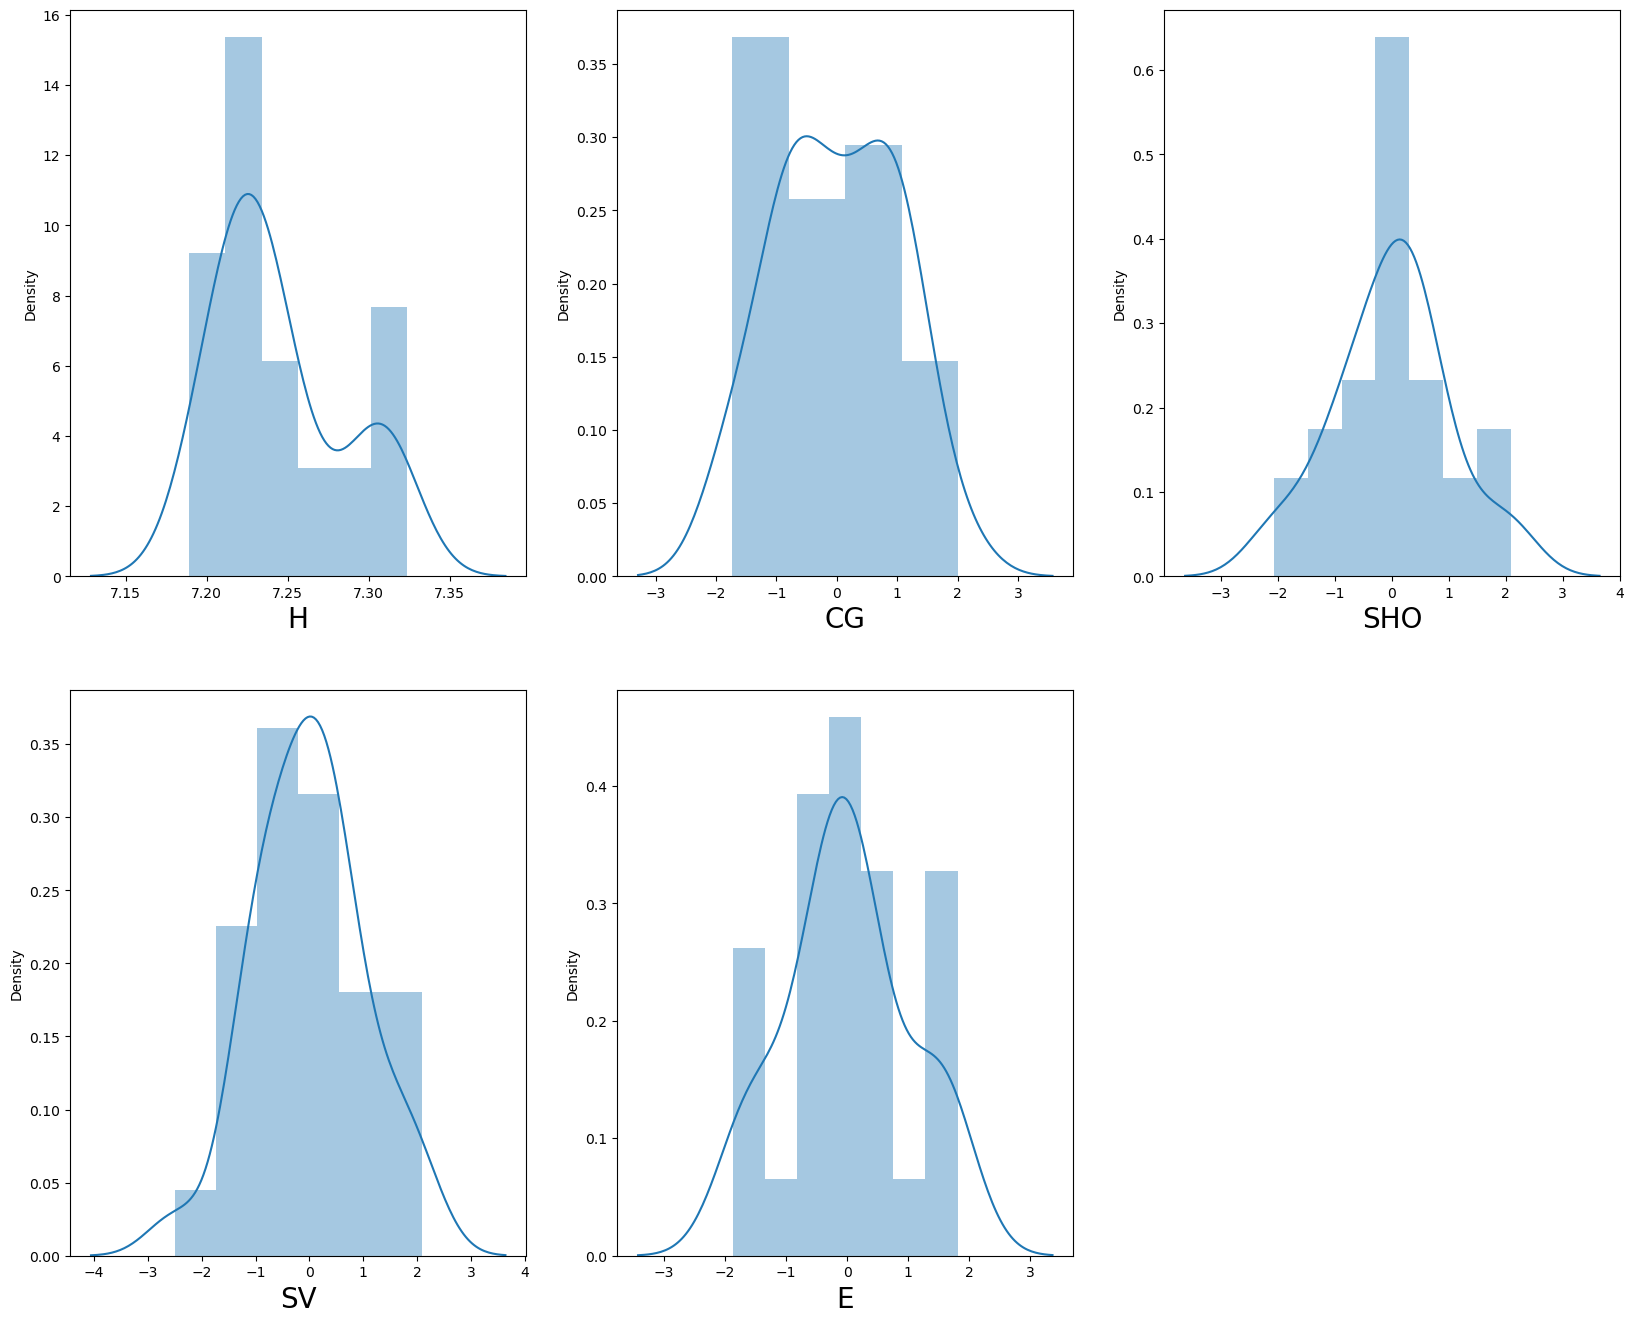

In [52]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df_new[skew_features]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [53]:
x = df_new.drop("W",axis=1)
y = df_new["W"]

In [56]:
from sklearn.preprocessing import StandardScaler
ssc=StandardScaler()
X = pd.DataFrame(ssc.fit_transform(x), columns=x.columns)

In [57]:
X.head()

R        AB         H        2B        3B        HR        BB  \
0  0.959398  0.830084  1.723726  1.556538  1.010845 -0.765863 -1.536359   
1  0.331147 -0.702831 -0.949846  0.201171  1.208917 -0.181389 -0.495021   
2 -0.274666 -1.100253 -0.088700  1.733325 -0.276617 -0.697101  1.252941   
3 -1.329231  0.233951 -0.347747 -0.800621 -0.474688 -0.869006 -1.145857   
4  0.174084  1.255894  2.030708  0.908319  1.704094 -0.353293 -0.197495   

         SO        SB        RA        ER       ERA        CG       SHO  \
0 -2.727623  0.905953 -0.664514 -0.511148 -0.511388 -0.307098 -0.787002   
1  0.121896 -0.585315  0.154638  0.232161  0.238952 -0.307098  0.236737   
2 -0.925866  0.116458 -0.678397 -0.754153 -0.643801  2.011315 -0.252844   
3 -0.201246 -0.673037  0.168522  0.089217  0.040333  1.264463 -0.513555   
4  0.072935 -0.015124  1.584683  1.561540  1.496876  1.264463  0.236737   

         SV         E  
0  1.532753 -0.348265  
1  0.312020 -0.540820  
2 -0.664137 -1.326125  
3 -0.820689  0.650818  
4 -1.149165 -0.540820

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

vif_Features Features
0       7.112342        R
1      20.237195       AB
2      10.114607        H
3       3.528059       2B
4       3.227808       3B
5       8.736960       HR
6       3.324550       BB
7       2.811546       SO
8       1.955254       SB
9     200.826177       RA
10   2079.420586       ER
11   1614.529449      ERA
12      2.912414       CG
13      3.274913      SHO
14      5.914692       SV
15      2.341746        E

In [59]:
X = X.drop(["ER"],axis=1)

In [60]:
X.head(10)

R        AB         H        2B        3B        HR        BB  \
0  0.959398  0.830084  1.723726  1.556538  1.010845 -0.765863 -1.536359   
1  0.331147 -0.702831 -0.949846  0.201171  1.208917 -0.181389 -0.495021   
2 -0.274666 -1.100253 -0.088700  1.733325 -0.276617 -0.697101  1.252941   
3 -1.329231  0.233951 -0.347747 -0.800621 -0.474688 -0.869006 -1.145857   
4  0.174084  1.255894  2.030708  0.908319  1.704094 -0.353293 -0.197495   
5  1.856900  0.716535 -0.051906 -0.093474 -1.266972  1.743939  1.643442   
6  0.712585 -0.447345 -0.553131 -1.625627 -1.167936  1.915843 -0.885522   
7 -0.835605 -0.447345 -0.310580  0.260100  0.020490  0.196801 -0.550807   
8  1.497899  1.752672  1.689389  1.202964  0.119526 -0.009484  0.230197   
9  1.565212 -0.078310  0.349394  0.319029  0.020490  0.368705  0.695081   

         SO        SB        RA       ERA        CG       SHO        SV  \
0 -2.727623  0.905953 -0.664514 -0.511388 -0.307098 -0.787002  1.532753   
1  0.121896 -0.585315  0.154638  0.238952 -0.307098  0.236737  0.312020   
2 -0.925866  0.116458 -0.678397 -0.643801  2.011315 -0.252844 -0.664137   
3 -0.201246 -0.673037  0.168522  0.040333  1.264463 -0.513555 -0.820689   
4  0.072935 -0.015124  1.584683  1.496876  1.264463  0.236737 -1.149165   
5 -0.240414 -0.892341  0.126870  0.150677  0.121871 -2.064039  0.677176   
6  0.777970 -1.725697  0.057451  0.194815 -1.732896 -0.252844  0.052325   
7  0.572335  0.160319 -0.650630 -0.489319 -0.870682  0.236737  1.908137   
8 -1.013995 -0.541454  0.890486  0.768604  0.121871 -0.252844 -0.365006   
9 -0.181661  0.774370  0.612808  0.614123  0.770649 -0.513555  0.312020   

          E  
0 -0.348265  
1 -0.540820  
2 -1.326125  
3  0.650818  
4 -0.540820  
5  0.082858  
6 -1.588197  
7  0.237592  
8  0.383386  
9  1.554265

In [61]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

vif_Features Features
0       6.069116        R
1       7.791456       AB
2       9.340727        H
3       3.227862       2B
4       3.125190       3B
5       7.474108       HR
6       3.323583       BB
7       2.786186       SO
8       1.787493       SB
9     142.535647       RA
10    141.460079      ERA
11      2.536866       CG
12      3.136960      SHO
13      2.630293       SV
14      2.272337        E

In [62]:
X = X.drop(["ERA"],axis=1)

In [63]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif


vif_Features Features
0       6.019438        R
1       5.210230       AB
2       7.728111        H
3       3.165732       2B
4       2.981242       3B
5       6.168639       HR
6       3.053363       BB
7       2.287734       SO
8       1.773119       SB
9       4.759240       RA
10      2.522962       CG
11      3.121855      SHO
12      2.606434       SV
13      2.239918        E

In [65]:
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

LR=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state{i}, The training accuracy is :-{r2_score(y_train,LR_predict_train)}')
    print(f'At random state{i}, The test accuracy is :-{r2_score(y_test,LR_predict_test)}')
    print('\n')

At random state0, The training accuracy is :-0.9768383015216392
At random state0, The test accuracy is :-0.49963681285930983


At random state1, The training accuracy is :-0.9762285427209911
At random state1, The test accuracy is :-0.18565756675537204


At random state2, The training accuracy is :-0.9638255316870877
At random state2, The test accuracy is :--0.2679901647385112


At random state3, The training accuracy is :-0.9677990948927816
At random state3, The test accuracy is :-0.6776697786663088


At random state4, The training accuracy is :-0.9680569379679667
At random state4, The test accuracy is :-0.7641316816582766


At random state5, The training accuracy is :-0.9612472010423033
At random state5, The test accuracy is :-0.6051495407605616


At random state6, The training accuracy is :-0.972376305674694
At random state6, The test accuracy is :-0.7504731543294931


At random state7, The training accuracy is :-0.9610245315460948
At random state7, The test accuracy is :-0.316695413

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=99)

In [67]:
x_train.shape

(22, 16)

In [68]:
y_train.shape

(22,)

In [69]:
x_test.shape

(7, 16)

In [70]:
y_test.shape

(7,)

In [71]:
from sklearn.linear_model import LinearRegression

LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.9633011594527373


In [72]:
print('MSE:',mean_squared_error(LR_predict,y_test))
print('MAE:',mean_absolute_error(LR_predict,y_test))
print('r2_score:',r2_score(LR_predict,y_test))

MSE: 27.077878720280413
MAE: 4.999072397568483
r2_score: 0.8702723798743279


In [74]:
from sklearn.linear_model import SGDRegressor
from sklearn import metrics
from sklearn.linear_model import Lasso,Ridge
sgd=SGDRegressor()
sgd.fit(x_train,y_train)
pred=sgd.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('mae:',metrics.mean_squared_error(y_test,pred))
print('mae:',metrics.mean_absolute_error(y_test,pred))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: -1.1060547011635088e+29
mae: 1.5006227863948997e+31
mae: 3857753668624687.0
rmse: 3873787276548494.0


In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100))}
ls=Lasso()
Z=GridSearchCV(ls,parameters)
Z.fit(x_train,y_train)
print(Z.best_params_)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.053e+00, tolerance: 1.251e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.207e+00, tolerance: 1.578e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.798e+01, tolerance: 

{'alpha': 10, 'random_state': 0}


In [79]:
parameters={'alpha':[0.001,0.01,0.1,1,10],'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']}
rd=Ridge()
Z1=GridSearchCV(rd,parameters)
Z1.fit(x_train,y_train)
print(Z1.best_params_)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

{'alpha': 10, 'solver': 'saga'}


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

In [80]:
rd=Ridge(alpha=10,solver='lsqr')
rd.fit(x_train,y_train)
pred=rd.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('mse:',metrics.mean_squared_error(y_test,pred))
print('mae:',metrics.mean_absolute_error(y_test,pred))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.8517903845207973
mse: 20.10811272868858
mae: 4.278922172643556
rmse: 4.484207034547867


In [85]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor


np.random.seed(10)
def rmse_cv(model,x,y):
    rmse =-(cross_val_score(model,x,y, scoring='neg_mean_squared_error', cv=10))
    return(rmse)

models = [LinearRegression(),
         Ridge(),
         SVR(kernel='linear'),
         SVR(kernel='poly'),
         SVR(kernel='rbf'),
         RandomForestRegressor(),
         DecisionTreeRegressor(),
         GradientBoostingRegressor(),]

names = ['LR','R','svr','svr_p','svr_r','RF','DTR','GBR']

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}   : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR   : 33.227142, 22.206678
R   : 32.549049, 32.609656
svr   : 58.165093, 34.299128
svr_p   : 111.891643, 79.768934
svr_r   : 112.275451, 79.777668
RF   : 39.864027, 24.023091
DTR   : 70.216667, 45.490539
GBR   : 47.569624, 31.099844


In [86]:
from sklearn.model_selection import GridSearchCV
parameter = {'alpha':[0.01,0.1,1.0,10.26],
            'selection':['cyclic','random'],
            'max_iter':[2,4,6,8,10],
            'tol':[100,1000],
            'fit_intercept':['bool']}

In [87]:
GVC=GridSearchCV(Lasso(),parameter,cv=5)

In [88]:
GVC.fit(x_train,y_train)

ValueError: 
All the 400 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py", line 892, in fit
    self._validate_params()
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py", line 97, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'fit_intercept' parameter of Lasso must be an instance of 'bool', an instance of 'numpy.bool_' or an instance of 'int'. Got 'bool' instead.


In [91]:
Final_mod=Lasso(alpha=1.0, fit_intercept="bool", max_iter=4, selection="random", tol=1000)
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test,pred)))

InvalidParameterError: The 'fit_intercept' parameter of Lasso must be an instance of 'bool', an instance of 'numpy.bool_' or an instance of 'int'. Got 'bool' instead.

In [90]:
import joblib
joblib.dump(Final_mod,"BaseBallCaseStudy.pkl")

NameError: name 'Final_mod' is not defined

In [92]:
import joblib
model=joblib.load("BaseballCaseStudy.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

FileNotFoundError: [Errno 2] No such file or directory: 'BaseballCaseStudy.pkl'

# Avacado-Project

In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


avacado_csv = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/avocado.csv')
avacado_csv.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0         0.0  27-12-2015          1.33      64236.62  1036.74   54454.85   
1         1.0  20-12-2015          1.35      54876.98   674.28   44638.81   
2         2.0  13-12-2015          0.93     118220.22   794.70  109149.67   
3         3.0  06-12-2015          1.08      78992.15  1132.00   71976.41   
4         4.0  29-11-2015          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

     year  region  
0  2015.0  Albany  
1  2015.0  Albany  
2  2015.0  Albany  
3  2015.0  Albany  
4  2015.0  Albany

In [94]:
avacado_csv.shape

(16468, 14)

In [95]:
avacado_csv.dtypes

Unnamed: 0      float64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

In [96]:
avacado_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   float64
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   float64
 13  region        1517 non-null   object 
dtypes: float64(11), object(3)
memory usage: 1.8+ MB


In [98]:
avacado_csv.describe()

Unnamed: 0  AveragePrice  Total Volume          4046          4225  \
count  1517.000000   1517.000000  1.517000e+03  1.517000e+03  1.517000e+03   
mean     26.995386      1.074990  1.601879e+06  6.464387e+05  6.114375e+05   
std      14.848287      0.188891  4.433143e+06  1.947614e+06  1.672906e+06   
min       0.000000      0.490000  3.875074e+04  4.677200e+02  1.783770e+03   
25%      14.000000      0.980000  1.474700e+05  2.040034e+04  4.147606e+04   
50%      29.000000      1.080000  4.027919e+05  8.175117e+04  1.186649e+05   
75%      39.000000      1.190000  9.819751e+05  3.775785e+05  4.851503e+05   
max      51.000000      1.680000  4.465546e+07  1.893304e+07  1.895648e+07   

               4770    Total Bags    Small Bags    Large Bags    XLarge Bags  \
count  1.517000e+03  1.517000e+03  1.517000e+03  1.517000e+03    1517.000000   
mean   5.040550e+04  2.935974e+05  2.487736e+05  4.264205e+04    2181.771074   
std    1.377812e+05  7.579765e+05  6.474765e+05  1.182157e+05    7455.712144   
min    0.000000e+00  3.311770e+03  3.311770e+03  0.000000e+00       0.000000   
25%    9.112500e+02  3.620689e+04  2.972722e+04  5.407400e+02       0.000000   
50%    7.688170e+03  7.397906e+04  6.237569e+04  5.044350e+03       0.000000   
75%    2.916730e+04  1.576097e+05  1.461994e+05  2.926767e+04     401.480000   
max    1.381516e+06  6.736304e+06  5.893642e+06  1.121076e+06  108072.790000   

              year  
count  1517.000000  
mean   2015.162821  
std       0.369324  
min    2015.000000  
25%    2015.000000  
50%    2015.000000  
75%    2015.000000  
max    2016.000000

In [99]:
avacado_csv.isnull().sum()

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

In [100]:
avacado_csv.rename(columns={'4046': 'Small/Medium Hass Size'}, inplace = True)
avacado_csv.rename(columns={'4225': 'Large Hass Size'}, inplace = True)
avacado_csv.rename(columns={'4770': 'XLarge Hass Size'}, inplace = True)

In [101]:
avacado_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1517 non-null   float64
 1   Date                    1517 non-null   object 
 2   AveragePrice            1517 non-null   float64
 3   Total Volume            1517 non-null   float64
 4   Small/Medium Hass Size  1517 non-null   float64
 5   Large Hass Size         1517 non-null   float64
 6   XLarge Hass Size        1517 non-null   float64
 7   Total Bags              1517 non-null   float64
 8   Small Bags              1517 non-null   float64
 9   Large Bags              1517 non-null   float64
 10  XLarge Bags             1517 non-null   float64
 11  type                    1517 non-null   object 
 12  year                    1517 non-null   float64
 13  region                  1517 non-null   object 
dtypes: float64(11), object(3)
memory usage

In [103]:
avacado_csv.head()

Unnamed: 0        Date  AveragePrice  Total Volume  Small/Medium Hass Size  \
0         0.0  27-12-2015          1.33      64236.62                 1036.74   
1         1.0  20-12-2015          1.35      54876.98                  674.28   
2         2.0  13-12-2015          0.93     118220.22                  794.70   
3         3.0  06-12-2015          1.08      78992.15                 1132.00   
4         4.0  29-11-2015          1.28      51039.60                  941.48   

   Large Hass Size  XLarge Hass Size  Total Bags  Small Bags  Large Bags  \
0         54454.85             48.16     8696.87     8603.62       93.25   
1         44638.81             58.33     9505.56     9408.07       97.49   
2        109149.67            130.50     8145.35     8042.21      103.14   
3         71976.41             72.58     5811.16     5677.40      133.76   
4         43838.39             75.78     6183.95     5986.26      197.69   

   XLarge Bags          type    year  region  
0          0.0  conventional  2015.0  Albany  
1          0.0  conventional  2015.0  Albany  
2          0.0  conventional  2015.0  Albany  
3          0.0  conventional  2015.0  Albany  
4          0.0  conventional  2015.0  Albany

In [105]:
avocado = avacado_csv.drop(['Date', 'Unnamed: 0'], axis = 1)
#already dropped Unnamed, Date, and type!
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AveragePrice            1517 non-null   float64
 1   Total Volume            1517 non-null   float64
 2   Small/Medium Hass Size  1517 non-null   float64
 3   Large Hass Size         1517 non-null   float64
 4   XLarge Hass Size        1517 non-null   float64
 5   Total Bags              1517 non-null   float64
 6   Small Bags              1517 non-null   float64
 7   Large Bags              1517 non-null   float64
 8   XLarge Bags             1517 non-null   float64
 9   type                    1517 non-null   object 
 10  year                    1517 non-null   float64
 11  region                  1517 non-null   object 
dtypes: float64(10), object(2)
memory usage: 1.5+ MB


In [106]:
avo_type = pd.get_dummies(avocado['type'])

avocado = pd.concat([avocado, avo_type], axis=1)
print(avocado.sample(3))

      AveragePrice  Total Volume  Small/Medium Hass Size  Large Hass Size  \
5381           NaN           NaN                     NaN              NaN   
8374           NaN           NaN                     NaN              NaN   
8803           NaN           NaN                     NaN              NaN   

      XLarge Hass Size  Total Bags  Small Bags  Large Bags  XLarge Bags type  \
5381               NaN         NaN         NaN         NaN          NaN  NaN   
8374               NaN         NaN         NaN         NaN          NaN  NaN   
8803               NaN         NaN         NaN         NaN          NaN  NaN   

      year region  conventional  
5381   NaN    NaN             0  
8374   NaN    NaN             0  
8803   NaN    NaN             0  


In [107]:
avocado.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AveragePrice            1517 non-null   float64
 1   Total Volume            1517 non-null   float64
 2   Small/Medium Hass Size  1517 non-null   float64
 3   Large Hass Size         1517 non-null   float64
 4   XLarge Hass Size        1517 non-null   float64
 5   Total Bags              1517 non-null   float64
 6   Small Bags              1517 non-null   float64
 7   Large Bags              1517 non-null   float64
 8   XLarge Bags             1517 non-null   float64
 9   type                    1517 non-null   object 
 10  year                    1517 non-null   float64
 11  region                  1517 non-null   object 
 12  conventional            16468 non-null  uint8  
dtypes: float64(10), object(2), uint8(1)
memory usage: 1.5+ MB


In [108]:
avocado.head()

AveragePrice  Total Volume  Small/Medium Hass Size  Large Hass Size  \
0          1.33      64236.62                 1036.74         54454.85   
1          1.35      54876.98                  674.28         44638.81   
2          0.93     118220.22                  794.70        109149.67   
3          1.08      78992.15                 1132.00         71976.41   
4          1.28      51039.60                  941.48         43838.39   

   XLarge Hass Size  Total Bags  Small Bags  Large Bags  XLarge Bags  \
0             48.16     8696.87     8603.62       93.25          0.0   
1             58.33     9505.56     9408.07       97.49          0.0   
2            130.50     8145.35     8042.21      103.14          0.0   
3             72.58     5811.16     5677.40      133.76          0.0   
4             75.78     6183.95     5986.26      197.69          0.0   

           type    year  region  conventional  
0  conventional  2015.0  Albany             1  
1  conventional  2015.0  Albany             1  
2  conventional  2015.0  Albany             1  
3  conventional  2015.0  Albany             1  
4  conventional  2015.0  Albany             1

In [109]:
avocado = avocado.drop(['type', 'region'], axis = 1)
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AveragePrice            1517 non-null   float64
 1   Total Volume            1517 non-null   float64
 2   Small/Medium Hass Size  1517 non-null   float64
 3   Large Hass Size         1517 non-null   float64
 4   XLarge Hass Size        1517 non-null   float64
 5   Total Bags              1517 non-null   float64
 6   Small Bags              1517 non-null   float64
 7   Large Bags              1517 non-null   float64
 8   XLarge Bags             1517 non-null   float64
 9   year                    1517 non-null   float64
 10  conventional            16468 non-null  uint8  
dtypes: float64(10), uint8(1)
memory usage: 1.3 MB


In [110]:
avocado['conventional'] = avocado['conventional'].astype('float64')
avocado.dtypes
avocado['conventional'] = avocado['conventional']
avocado['conventional'].sample(3)

816      1.0
10843    0.0
15737    0.0
Name: conventional, dtype: float64

In [112]:
from sklearn.preprocessing import OneHotEncoder

con_enc = OneHotEncoder()
org_enc = OneHotEncoder()

cat_encoder = con_enc.fit_transform((avocado.conventional).values.reshape(-1,1)).toarray()

In [115]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AveragePrice            1517 non-null   float64
 1   Total Volume            1517 non-null   float64
 2   Small/Medium Hass Size  1517 non-null   float64
 3   Large Hass Size         1517 non-null   float64
 4   XLarge Hass Size        1517 non-null   float64
 5   Total Bags              1517 non-null   float64
 6   Small Bags              1517 non-null   float64
 7   Large Bags              1517 non-null   float64
 8   XLarge Bags             1517 non-null   float64
 9   year                    1517 non-null   float64
 10  conventional            16468 non-null  float64
dtypes: float64(11)
memory usage: 1.4 MB


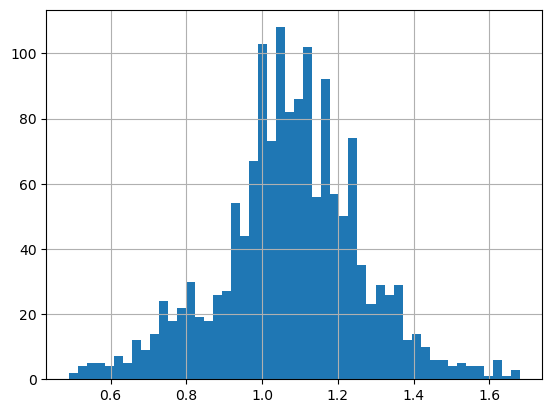

In [116]:
avocado["AveragePrice"].hist(bins=50)
plt.show()

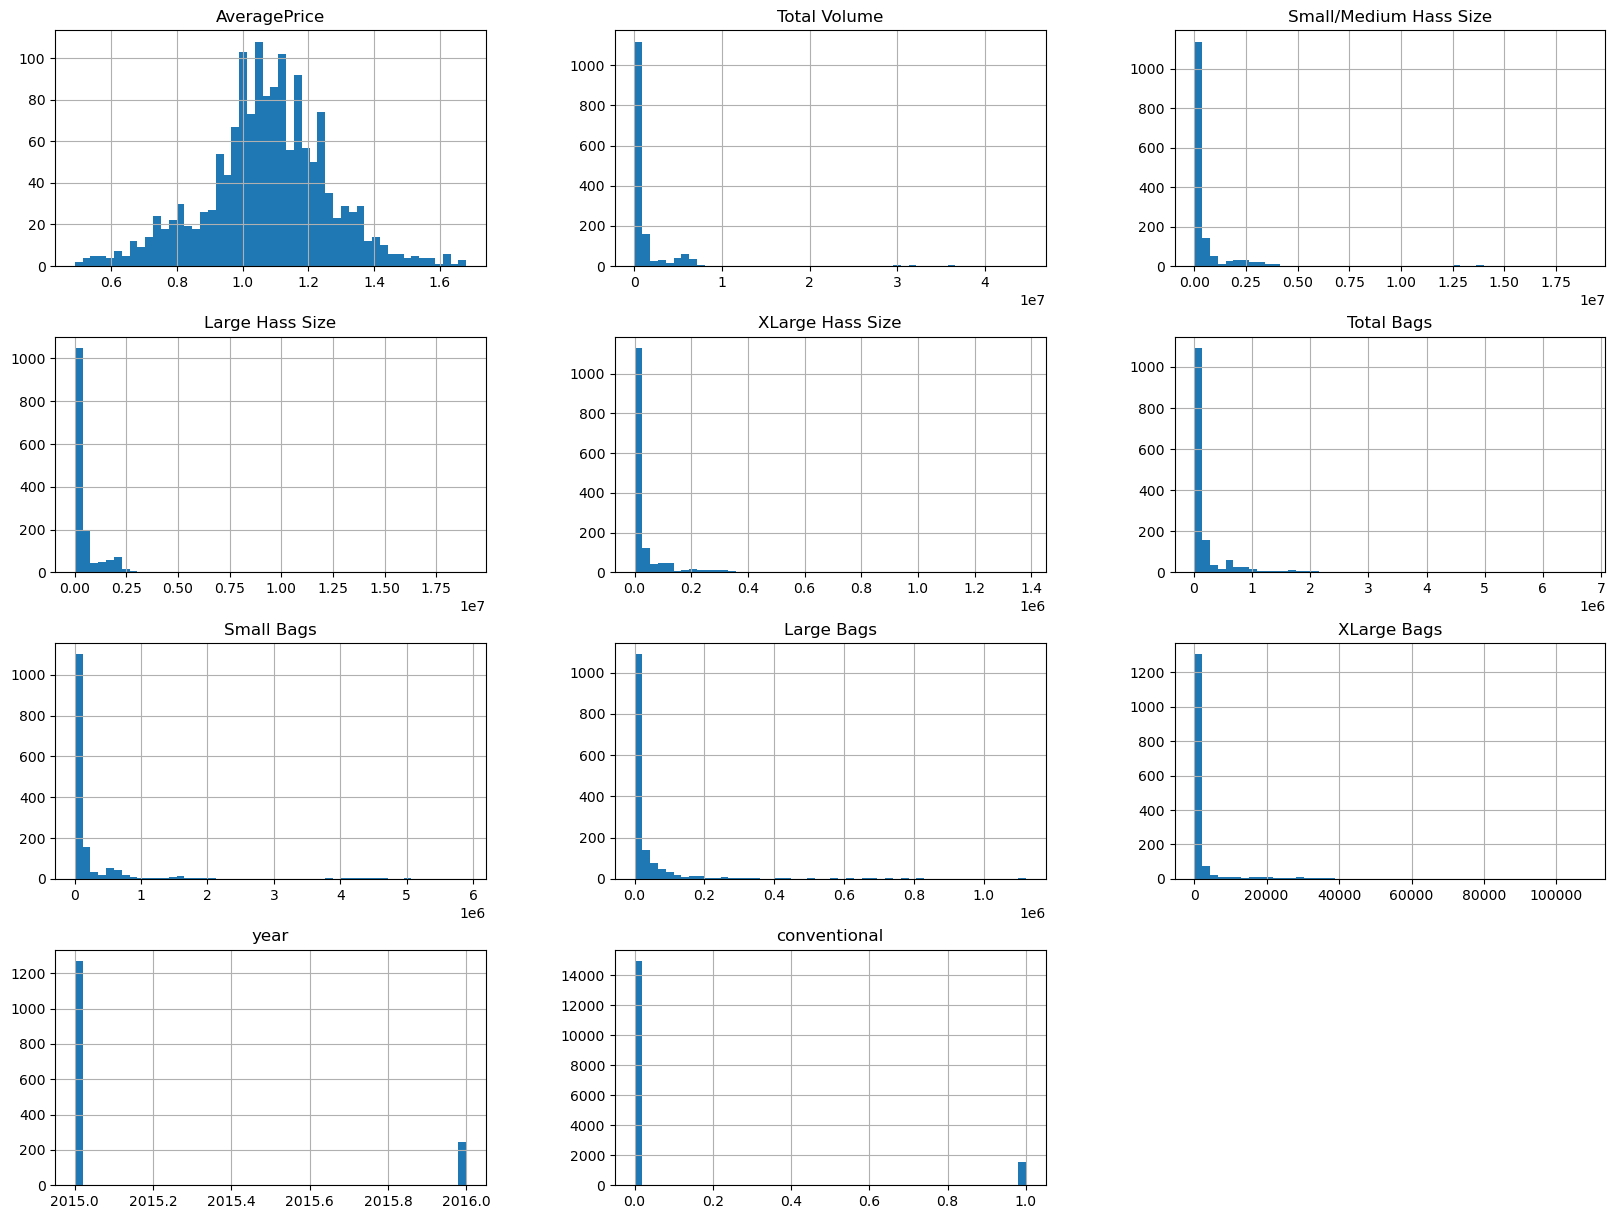

In [117]:
avocado.hist(bins=50, figsize=(20,15))
plt.show()

In [118]:
avocado = avocado.dropna(axis=0)

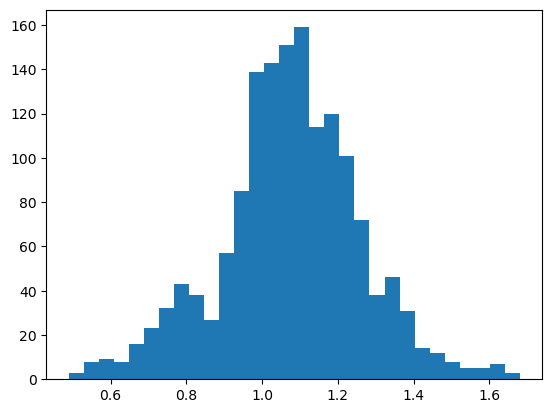

In [119]:
plt.hist(avocado['AveragePrice'], bins = 30)
plt.show()

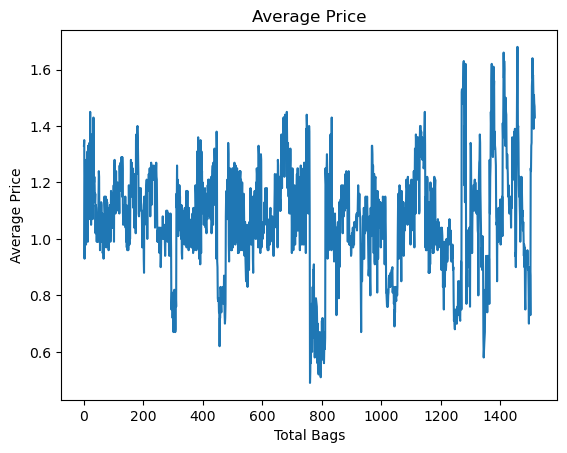

In [120]:
plt.plot(avocado['AveragePrice'])
plt.title('Average Price')
plt.xlabel('Total Bags')
plt.ylabel('Average Price')
plt.show()

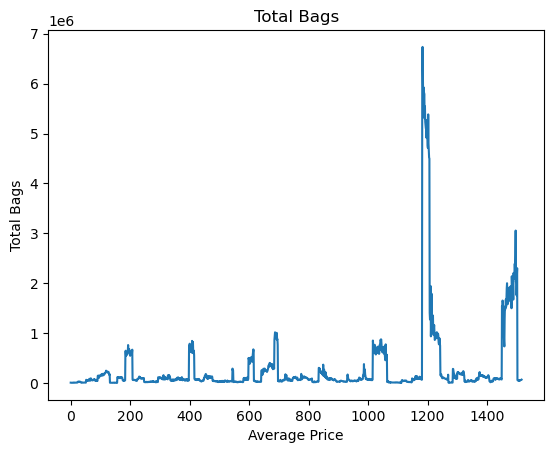

In [121]:
plt.plot(avocado['Total Bags'])
plt.title('Total Bags')
plt.xlabel('Average Price')
plt.ylabel('Total Bags')
plt.show()

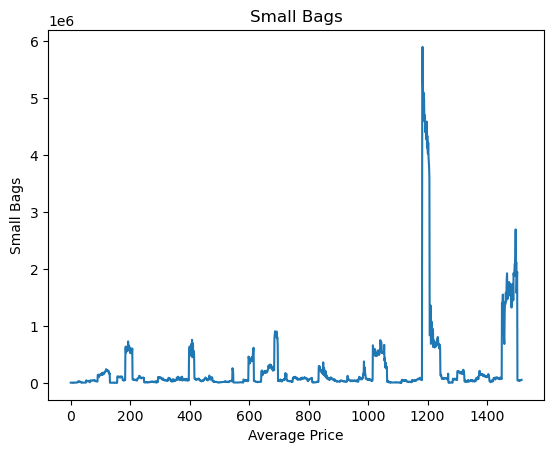

In [122]:
plt.plot(avocado['Small Bags'])
plt.title('Small Bags')
plt.xlabel('Average Price')
plt.ylabel('Small Bags')
plt.show()

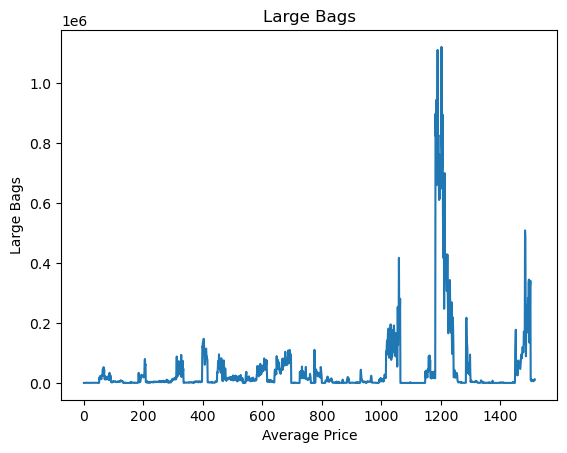

In [123]:
plt.plot(avocado['Large Bags'])
plt.title('Large Bags')
plt.xlabel('Average Price')
plt.ylabel('Large Bags')
plt.show()

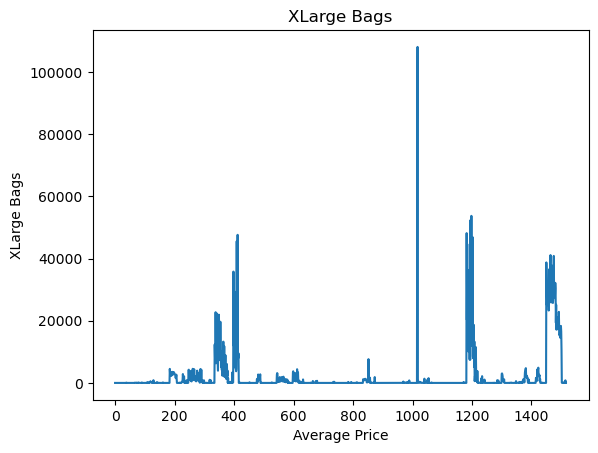

In [124]:
plt.plot(avocado['XLarge Bags'])
plt.title('XLarge Bags')
plt.xlabel('Average Price')
plt.ylabel('XLarge Bags')
plt.show()

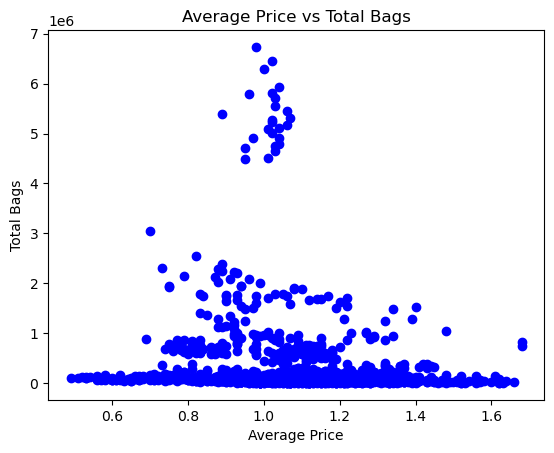

In [125]:

plt.scatter(avocado['AveragePrice'],avocado['Total Bags'], color='blue')
plt.title('Average Price vs Total Bags')
plt.xlabel('Average Price')
plt.ylabel('Total Bags')
plt.show()



In [126]:
avocado.mean()

AveragePrice              1.074990e+00
Total Volume              1.601879e+06
Small/Medium Hass Size    6.464387e+05
Large Hass Size           6.114375e+05
XLarge Hass Size          5.040550e+04
Total Bags                2.935974e+05
Small Bags                2.487736e+05
Large Bags                4.264205e+04
XLarge Bags               2.181771e+03
year                      2.015163e+03
conventional              1.000000e+00
dtype: float64

In [127]:
x= avocado['AveragePrice'].mean()
x

1.0749901120632828

In [128]:
x= avocado['Total Bags'].mean()
x

293597.41573500325

In [129]:
avocado.min()

AveragePrice                  0.49
Total Volume              38750.74
Small/Medium Hass Size      467.72
Large Hass Size            1783.77
XLarge Hass Size              0.00
Total Bags                 3311.77
Small Bags                 3311.77
Large Bags                    0.00
XLarge Bags                   0.00
year                       2015.00
conventional                  1.00
dtype: float64

In [130]:
avocado.max()

AveragePrice                     1.68
Total Volume              44655461.51
Small/Medium Hass Size    18933038.04
Large Hass Size           18956479.74
XLarge Hass Size           1381516.11
Total Bags                 6736304.04
Small Bags                 5893641.72
Large Bags                 1121076.47
XLarge Bags                 108072.79
year                          2016.00
conventional                     1.00
dtype: float64

In [131]:

avocado.median()

AveragePrice                   1.08
Total Volume              402791.86
Small/Medium Hass Size     81751.17
Large Hass Size           118664.89
XLarge Hass Size            7688.17
Total Bags                 73979.06
Small Bags                 62375.69
Large Bags                  5044.35
XLarge Bags                    0.00
year                        2015.00
conventional                   1.00
dtype: float64

In [132]:

avocado.std()

AveragePrice              1.888912e-01
Total Volume              4.433143e+06
Small/Medium Hass Size    1.947614e+06
Large Hass Size           1.672906e+06
XLarge Hass Size          1.377812e+05
Total Bags                7.579765e+05
Small Bags                6.474765e+05
Large Bags                1.182157e+05
XLarge Bags               7.455712e+03
year                      3.693244e-01
conventional              0.000000e+00
dtype: float64

In [133]:

corr_matrix = avocado.corr()
corr_matrix

AveragePrice  Total Volume  Small/Medium Hass Size  \
AveragePrice                1.000000     -0.140470               -0.190096   
Total Volume               -0.140470      1.000000                0.985568   
Small/Medium Hass Size     -0.190096      0.985568                1.000000   
Large Hass Size            -0.092084      0.987154                0.951952   
XLarge Hass Size           -0.100567      0.934347                0.898570   
Total Bags                 -0.111597      0.967689                0.930395   
Small Bags                 -0.097682      0.960642                0.922278   
Large Bags                 -0.177480      0.910226                0.884229   
XLarge Bags                -0.048284      0.521717                0.474063   
year                        0.178683     -0.004189               -0.040439   
conventional                     NaN           NaN                     NaN   

                        Large Hass Size  XLarge Hass Size  Total Bags  \
AveragePrice                  -0.092084         -0.100567   -0.111597   
Total Volume                   0.987154          0.934347    0.967689   
Small/Medium Hass Size         0.951952          0.898570    0.930395   
Large Hass Size                1.000000          0.927757    0.951779   
XLarge Hass Size               0.927757          1.000000    0.926405   
Total Bags                     0.951779          0.926405    1.000000   
Small Bags                     0.943988          0.923607    0.997341   
Large Bags                     0.900496          0.840523    0.911336   
XLarge Bags                    0.504718          0.646053    0.601856   
year                          -0.007254          0.029222    0.090108   
conventional                        NaN               NaN         NaN   

                        Small Bags  Large Bags  XLarge Bags      year  \
AveragePrice             -0.097682   -0.177480    -0.048284  0.178683   
Total Volume              0.960642    0.910226     0.521717 -0.004189   
Small/Medium Hass Size    0.922278    0.884229     0.474063 -0.040439   
Large Hass Size           0.943988    0.900496     0.504718 -0.007254   
XLarge Hass Size          0.923607    0.840523     0.646053  0.029222   
Total Bags                0.997341    0.911336     0.601856  0.090108   
Small Bags                1.000000    0.879131     0.611300  0.106382   
Large Bags                0.879131    1.000000     0.447779 -0.018678   
XLarge Bags               0.611300    0.447779     1.000000  0.218342   
year                      0.106382   -0.018678     0.218342  1.000000   
conventional                   NaN         NaN          NaN       NaN   

                        conventional  
AveragePrice                     NaN  
Total Volume                     NaN  
Small/Medium Hass Size           NaN  
Large Hass Size                  NaN  
XLarge Hass Size                 NaN  
Total Bags                       NaN  
Small Bags                       NaN  
Large Bags                       NaN  
XLarge Bags                      NaN  
year                             NaN  
conventional                     NaN

In [134]:
corr_matrix["AveragePrice"].sort_values(ascending=False)

AveragePrice              1.000000
year                      0.178683
XLarge Bags              -0.048284
Large Hass Size          -0.092084
Small Bags               -0.097682
XLarge Hass Size         -0.100567
Total Bags               -0.111597
Total Volume             -0.140470
Large Bags               -0.177480
Small/Medium Hass Size   -0.190096
conventional                   NaN
Name: AveragePrice, dtype: float64

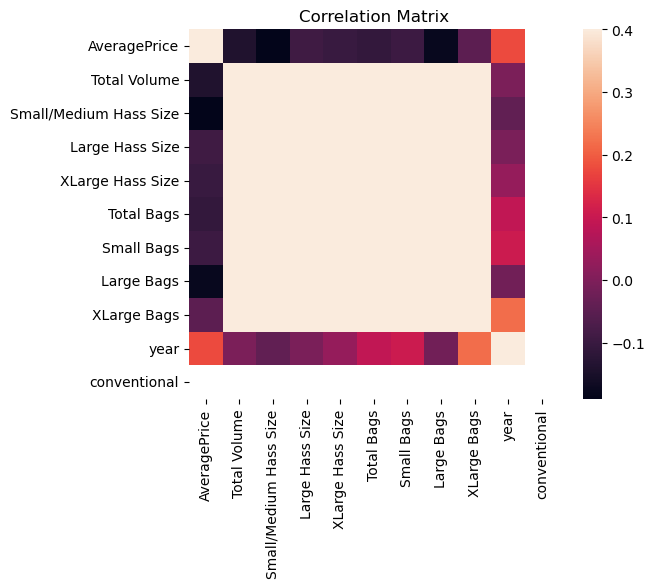

<Figure size 1600x800 with 0 Axes>

In [135]:


sns.heatmap(avocado.corr(), vmax = 0.4, square = True)
plt.title("Correlation Matrix")
fig = plt.figure(figsize = (16, 8))
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


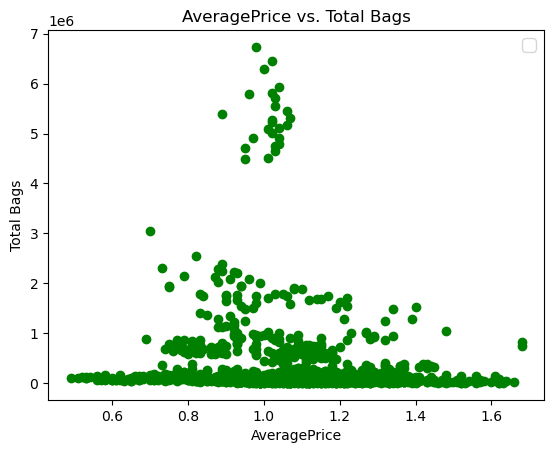

In [136]:
plt.scatter(avocado['AveragePrice'],avocado['Total Bags'], color='green' )
plt.title('AveragePrice vs. Total Bags')
plt.xlabel('AveragePrice')
plt.ylabel('Total Bags')
plt.legend(loc="upper right", fontsize=12)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


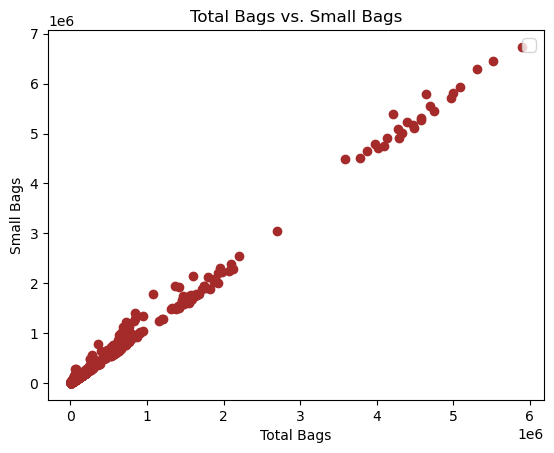

In [137]:


plt.scatter(avocado['Small Bags'],avocado['Total Bags'], color='brown' )
plt.title('Total Bags vs. Small Bags')
plt.xlabel('Total Bags')
plt.ylabel('Small Bags')
plt.legend(loc="upper right", fontsize=12)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


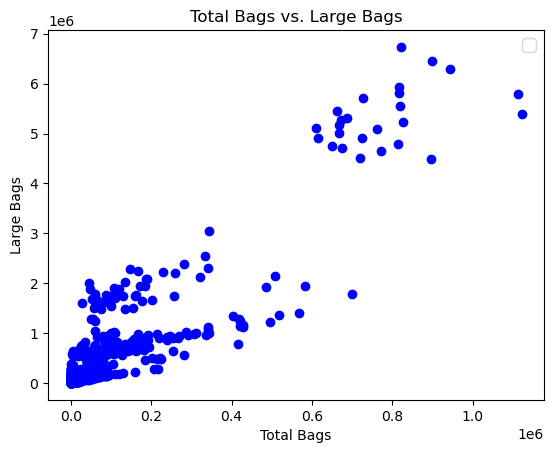

In [138]:
plt.scatter(avocado['Large Bags'],avocado['Total Bags'], color='blue' )
plt.title('Total Bags vs. Large Bags')
plt.xlabel('Total Bags')
plt.ylabel('Large Bags')
plt.legend(loc="upper right", fontsize=12)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


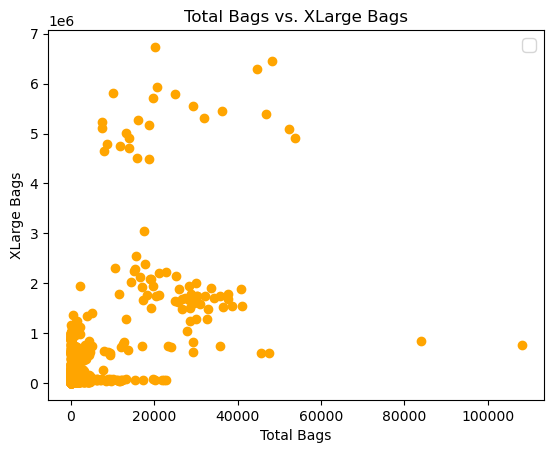

In [139]:


plt.scatter(avocado['XLarge Bags'],avocado['Total Bags'], color='orange' )
plt.title('Total Bags vs. XLarge Bags')
plt.xlabel('Total Bags')
plt.ylabel('XLarge Bags')
plt.legend(loc="upper right", fontsize=12)
plt.show()

array([[<Axes: xlabel='Total Bags', ylabel='Total Bags'>,
        <Axes: xlabel='Small Bags', ylabel='Total Bags'>,
        <Axes: xlabel='Large Bags', ylabel='Total Bags'>,
        <Axes: xlabel='XLarge Bags', ylabel='Total Bags'>],
       [<Axes: xlabel='Total Bags', ylabel='Small Bags'>,
        <Axes: xlabel='Small Bags', ylabel='Small Bags'>,
        <Axes: xlabel='Large Bags', ylabel='Small Bags'>,
        <Axes: xlabel='XLarge Bags', ylabel='Small Bags'>],
       [<Axes: xlabel='Total Bags', ylabel='Large Bags'>,
        <Axes: xlabel='Small Bags', ylabel='Large Bags'>,
        <Axes: xlabel='Large Bags', ylabel='Large Bags'>,
        <Axes: xlabel='XLarge Bags', ylabel='Large Bags'>],
       [<Axes: xlabel='Total Bags', ylabel='XLarge Bags'>,
        <Axes: xlabel='Small Bags', ylabel='XLarge Bags'>,
        <Axes: xlabel='Large Bags', ylabel='XLarge Bags'>,
        <Axes: xlabel='XLarge Bags', ylabel='XLarge Bags'>]], dtype=object)

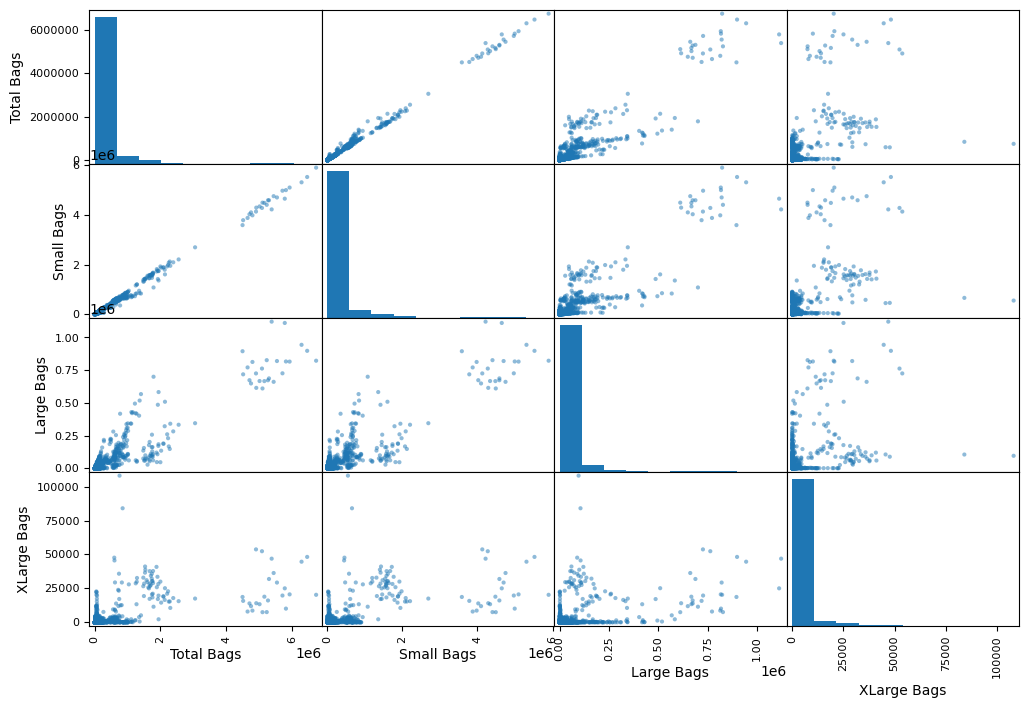

In [140]:


from pandas.plotting import scatter_matrix

attributes = ["Total Bags", "Small Bags", "Large Bags",
              "XLarge Bags"]
scatter_matrix(avocado[attributes], figsize=(12, 8))

In [141]:

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(avocado, test_size=0.2, random_state=42)
test_set.head()

AveragePrice  Total Volume  Small/Medium Hass Size  Large Hass Size  \
724           1.18     425885.58                 2279.37        300069.61   
812           1.25      73109.90                 1241.48         45856.11   
1466          1.08    6681646.14              2501655.40       2179345.27   
1469          1.07    6538335.89              2200099.61       2538994.07   
51            1.22      40873.28                 2819.50         28287.42   

      XLarge Hass Size  Total Bags  Small Bags  Large Bags  XLarge Bags  \
724           14779.66   108756.94   108756.94        0.00         0.00   
812             951.32    25060.99    17512.17     7392.15       156.67   
1466         107653.45  1892992.02  1819641.81    47476.91     25873.30   
1469         218247.48  1580994.73  1476927.50    73032.78     31034.45   
51               49.90     9716.46     9186.93      529.53         0.00   

        year  conventional  
724   2015.0           1.0  
812   2015.0           1.0  
1466  2016.0           1.0  
1469  2016.0           1.0  
51    2015.0           1.0

In [142]:
Y_train = train_set['AveragePrice']
X_train = train_set.drop(['AveragePrice'],axis = 1)

In [143]:
Y_test = test_set['AveragePrice']
X_test = test_set.drop(['AveragePrice'],axis = 1)

In [144]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
LR = LinearRegression()
LR.fit(X_train, Y_train)

LinearRegression()

In [145]:
pred = LR.predict(X_test)
mean_squared_error(pred, Y_test)

0.029907763118432854

In [146]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor (n_estimators = 100, min_samples_leaf = 10, random_state = 42)
RFR.fit(X_train, Y_train)

RandomForestRegressor(min_samples_leaf=10, random_state=42)

In [147]:
pred2 = RFR.predict(X_test)
mean_squared_error(pred2, Y_test)

0.010070543055560228

In [148]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X_train, Y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR(epsilon=1.5, random_state=42)

In [149]:
pred2 = svm_reg.predict(X_test)
mean_squared_error(pred2, Y_test)

61.87378834809607

# HR Analytics Project- Understanding the Attrition in HR

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

hr_csv = pd.read_csv('https://raw.githubusercontent.com/shantanu1109/IBM-HR-Analytics-Employee-Attrition-and-Performance-Prediction/main/DATASET/IBM-HR-Analytics-Employee-Attrition-and-Performance-Revised.csv')
hr_csv.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome      Education EducationField EnvironmentSatisfaction  \
0                 1        College  Life Sciences                  Medium   
1                 8  Below College  Life Sciences                    High   
2                 2        College          Other               Very High   
3                 3         Master  Life Sciences               Very High   
4                 2  Below College        Medical                     Low   

   Gender  ...  PerformanceRating RelationshipSatisfaction StockOptionLevel  \
0  Female  ...          Excellent                      Low                0   
1    Male  ...        Outstanding                Very High                1   
2    Male  ...          Excellent                   Medium                0   
3  Female  ...          Excellent                     High                0   
4    Male  ...          Excellent                Very High                1   

  TotalWorkingYears TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 8                     0             Bad               6   
1                10                     3          Better              10   
2                 7                     3          Better               0   
3                 8                     3          Better               8   
4                 6                     3          Better               2   

   YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  
0                   4                        0                    5  
1                   7                        1                    7  
2                   0                        0                    0  
3                   7                        3                    0  
4                   2                        2                    2  

[5 rows x 31 columns]

In [5]:
hr_csv.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [6]:
hr_csv.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [7]:

hr_csv.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   object
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   object
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   object
 12  JobLevel                  1470 non-null   object
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [8]:


hr_csv.describe()

Age    DailyRate  DistanceFromHome   HourlyRate  MonthlyIncome  \
count  1470.000000  1470.000000       1470.000000  1470.000000    1470.000000   
mean     36.923810   802.485714          9.192517    65.891156    6502.931293   
std       9.135373   403.509100          8.106864    20.329428    4707.956783   
min      18.000000   102.000000          1.000000    30.000000    1009.000000   
25%      30.000000   465.000000          2.000000    48.000000    2911.000000   
50%      36.000000   802.000000          7.000000    66.000000    4919.000000   
75%      43.000000  1157.000000         14.000000    83.750000    8379.000000   
max      60.000000  1499.000000         29.000000   100.000000   19999.000000   

        MonthlyRate  NumCompaniesWorked  PercentSalaryHike  StockOptionLevel  \
count   1470.000000         1470.000000        1470.000000       1470.000000   
mean   14313.103401            2.693197          15.209524          0.793878   
std     7117.786044            2.498009           3.659938          0.852077   
min     2094.000000            0.000000          11.000000          0.000000   
25%     8047.000000            1.000000          12.000000          0.000000   
50%    14235.500000            2.000000          14.000000          1.000000   
75%    20461.500000            4.000000          18.000000          1.000000   
max    26999.000000            9.000000          25.000000          3.000000   

       TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
count        1470.000000            1470.000000     1470.000000   
mean           11.279592               2.799320        7.008163   
std             7.780782               1.289271        6.126525   
min             0.000000               0.000000        0.000000   
25%             6.000000               2.000000        3.000000   
50%            10.000000               3.000000        5.000000   
75%            15.000000               3.000000        9.000000   
max            40.000000               6.000000       40.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count         1470.000000              1470.000000           1470.000000  
mean             4.229252                 2.187755              4.123129  
std              3.623137                 3.222430              3.568136  
min              0.000000                 0.000000              0.000000  
25%              2.000000                 0.000000              2.000000  
50%              3.000000                 1.000000              3.000000  
75%              7.000000                 3.000000              7.000000  
max             18.000000                15.000000             17.000000

In [11]:
hr_csv.shape

(1470, 31)

In [12]:
object_datatypes=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='O':
        object_datatypes.append(x)
object_datatypes   

['Departments ', 'salary']

In [13]:
integer_datatypes=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='int64':
      integer_datatypes.append(x)
integer_datatypes

['number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years']

In [14]:
hr_csv.nunique().to_frame("Unique values")

Unique values
Age                                  43
Attrition                             2
BusinessTravel                        3
DailyRate                           886
Department                            3
DistanceFromHome                     29
Education                             5
EducationField                        6
EnvironmentSatisfaction               4
Gender                                2
HourlyRate                           71
JobInvolvement                        4
JobLevel                              5
JobRole                               9
JobSatisfaction                       4
MaritalStatus                         3
MonthlyIncome                      1349
MonthlyRate                        1427
NumCompaniesWorked                   10
OverTime                              2
PercentSalaryHike                    15
PerformanceRating                     2
RelationshipSatisfaction              4
StockOptionLevel                      4
TotalWorkingYears                    40
TrainingTimesLastYear                 7
WorkLifeBalance                       4
YearsAtCompany                       37
YearsInCurrentRole                   19
YearsSinceLastPromotion              16
YearsWithCurrManager                 18

In [15]:
for col in object_datatypes:
    print(col)
    print(df[col].value_counts())
    print("="*80)

Departments 
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Departments , dtype: int64
salary
low       7316
medium    6446
high      1237
Name: salary, dtype: int64
